# - Neuron models
# - Temporal Backpropagation(S4nn)
# - STDP
# - BindsNet software

# Neuron models:


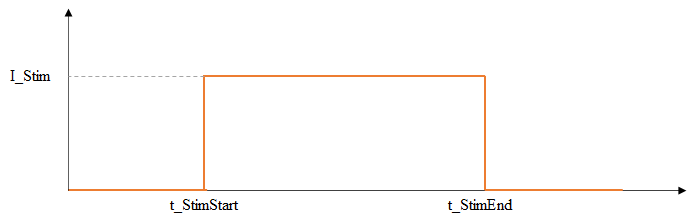

In [1]:
#LIF Neuron with constant input current:
from IPython.display import Image 
Image('Images/LIF_C_I.png')

Text(0, 0.5, 'Voltage in mV')

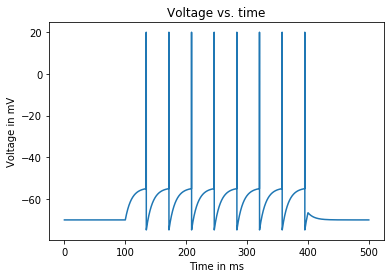

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 0.1            #time step [ms]
t_end = 500         #total time of run [ms]
t_StimStart = 100   #time to start injecting current [ms]
t_StimEnd = 400     #time to end injecting current [ms]
E_L = -70           #resting membrane potential [mV]
V_th = -55          #spike threshold [mV]
V_reset = -75       #value to reset voltage to after a spike [mV]
V_spike = 20        #value to draw a spike to, when cell spikes [mV]
R_m = 10            #membrane resistance [KOhm]
C_m = 1             #capacitance (uF)
tau = R_m*C_m       #membrane time constant [ms]

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0
I_Stim = 1.55;  #magnitude of pulse of injected current [nA]
I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)   #add portion from 
# t=t_StimStart to t=t_StimEnd
I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 
#t=t_StimEnd to t=t_end
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
for n in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
    V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
    V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage
        
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
#MAKE PLOTS

plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')


In [ ]:
####### Ex1: Change the parameters


from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 0.1  #time step [ms]
t_end = #           #total time of run [ms]
t_StimStart = #     #time to start injecting current [ms]
t_StimEnd = #       #time to end injecting current [ms]
E_L = #             #resting membrane potential [mV]
V_th = #            #spike threshold [mV]
V_reset = #         #value to reset voltage to after a spike [mV]
V_spike = #          #value to draw a spike to, when cell spikes [mV]
R_m = #              #membrane resistance [KOhm]
C_m = #              #capacitance (uF)
tau = R_m*C_m       #membrane time constant [ms]

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0
I_Stim = #       #magnitude of pulse of injected current [nA]
I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)   #add portion from 
# t=t_StimStart to t=t_StimEnd
I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 
#t=t_StimEnd to t=t_end
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
for n in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
    V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
    V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage
        
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
#MAKE PLOTS

plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')


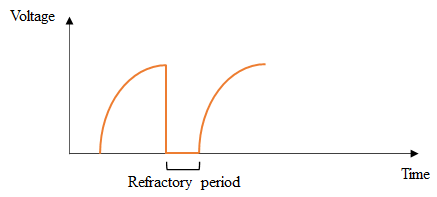

In [4]:
# LIF Neuron with Constant input current and refractory period:
from IPython.display import Image 
Image('Images/LIF_CI_R.png')

Text(0, 0.5, 'Voltage in mV')

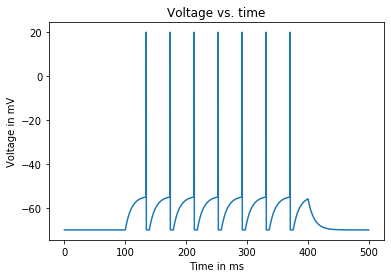

In [18]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 0.1            #time step [ms]
t_end = 500         #total time of run [ms]
t_StimStart = 100   #time to start injecting current [ms]
t_StimEnd = 400     #time to end injecting current [ms]
E_L = -70           #resting membrane potential [mV]
V_th = -55          #spike threshold [mV]
V_reset = -75       #value to reset voltage to after a spike [mV]
V_spike = 20        #value to draw a spike to, when cell spikes [mV]
R_m = 10            #membrane resistance [KOhm]
C_m = 1             #capacitance (uF)
tau = R_m*C_m       #membrane time constant [ms]
tau_ref = 50         # refractory period (msec)
t_rest = 0

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0
I_Stim = 1.55;  #magnitude of pulse of injected current [nA]
I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)   #add portion from 
# t=t_StimStart to t=t_StimEnd
I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 
#t=t_StimEnd to t=t_end
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
for n in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms
    if n > t_rest:
        V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 

        V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
        t_rest = n + tau_ref
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage
                
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
#MAKE PLOTS

plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')


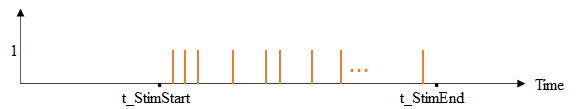

In [6]:
# LIF Neuron with spiking inputs:
from IPython.display import Image 
Image('Images/LIF_S_I.png')

Text(0, 0.5, 'Spike times')

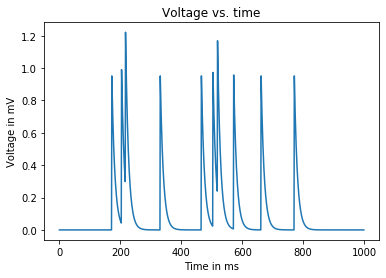

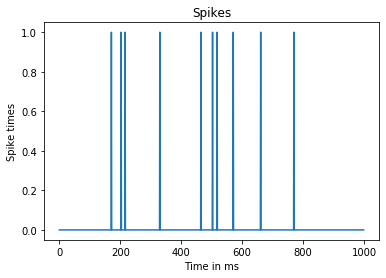

In [24]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 1  #time step [ms]
t_end = 1000  #total time of run [ms]
t_StimStart = 100  #time to start injecting current [ms]
t_StimEnd = 800  #time to end injecting current [ms]
E_L = 0  #resting membrane potential [mV]
V_th = 2  #spike threshold [mV]
V_reset = 0  #value to reset voltage to after a spike [mV]s [mV]
V_spike = 10
R_m = 10  #membrane resistance [KOhm]
C_m = 1 # capacitance (uF)
tau = R_m*C_m #membrane time constant [ms]

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0


I_Stim = np.random.randint(t_StimStart,t_StimEnd,10)  
I_Stim = np.sort(I_Stim)
I_Stim = np.unique(I_Stim)
I_e_vect = np.zeros((1,int(t_end/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
n = 0
for j in range(int(t_end/dt)):
    if (n<len(I_Stim)):
        if (j==I_Stim[n]):
            I_e_vect[0,j] = 1
            n+=1    
        else:
            I_e_vect[0,j] = 0
    else:
            I_e_vect[0,j] = 0
            


V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
for t in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
    V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
    V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage      
        
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
    
#MAKE PLOTS
plt.figure(1)
plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')
plt.figure(2)
plt.plot(t_vect, I_e_vect.reshape(len(t_vect)))
title('Spikes')
xlabel('Time in ms')
ylabel('Spike times')



In [ ]:
####### Ex2: Change the parameters

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 1  #time step [ms]
t_end = #           #total time of run [ms]
t_StimStart = #     #time to start injecting current [ms]
t_StimEnd = #       #time to end injecting current [ms]
E_L = #             #resting membrane potential [mV]
V_th = #            #spike threshold [mV]
V_reset = #         #value to reset voltage to after a spike [mV]s [mV]
V_spike = #
R_m = #             #membrane resistance [KOhm]
C_m = #             #capacitance (uF)
tau = R_m*C_m       #membrane time constant [ms]

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
I_Stim = np.random.randint(t_StimStart,t_StimEnd,100)  
I_Stim = np.sort(I_Stim)
I_Stim = np.unique(I_Stim)
I_e_vect = np.zeros((1,int(t_end/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
n = 0
for j in range(int(t_end/dt)):
    if (n<len(I_Stim)):
        if (j==I_Stim[n]):
            I_e_vect[0,j] = 1
            n+=1    
        else:
            I_e_vect[0,j] = 0
    else:
            I_e_vect[0,j] = 0
            


V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0
for t in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
    V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
    V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage      
        
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
    
#MAKE PLOTS
plt.figure(1)
plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')
plt.figure(2)
plt.plot(t_vect, I_e_vect.reshape(len(t_vect)))
title('Spikes')
xlabel('Time in ms')
ylabel('Spike times')



Text(0, 0.5, 'Spike times')

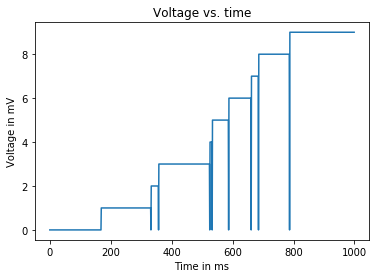

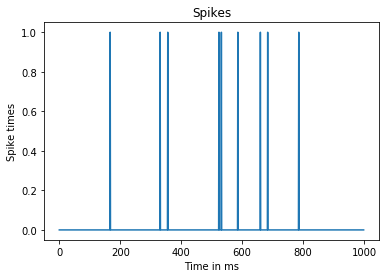

In [23]:
########################## IF Neuron with spiking inputs: ##########################

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 1               #time step [ms]
t_end = 1000         #total time of run [ms]
t_StimStart = 100    #time to start injecting current [ms]
t_StimEnd = 800      #time to end injecting current [ms]
E_L = 0              #resting membrane potential [mV]
V_th = 20            #spike threshold [mV]
V_reset = 0          #value to reset voltage to after a spike [mV]


#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)       #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
i = 0           # index denoting which element of V is being assigned
V_vect[i]=E_L   #first element of V, i.e. value of V at t=0

#Generate the input spike times
I_Stim = np.random.randint(t_StimStart,t_StimEnd,10)  
I_Stim = np.sort(I_Stim)
I_Stim = np.unique(I_Stim)
I_e_vect = np.zeros((1,int(t_end/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
n = 0
for j in range(int(t_end/dt)):
    if (n<len(I_Stim)):
        if (j==I_Stim[n]):
            I_e_vect[0,j] = 1
            n+=1    
        else:
            I_e_vect[0,j] = 0
    else:
            I_e_vect[0,j] = 0
        

#The IF neuron
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0
for t in range(int(t_end/dt)-1):            #loop through values of t in steps of dt ms 
    if (I_e_vect[0,i]==1):        
        V_vect[0,i+1] = V_vect[0,i] + 1 
      #if statement below says what to do if voltage crosses threshold
        if (V_vect[0,i+1] > V_th):          #cell spiked
            V_vect[0,i+1] = V_reset;        #set voltage back to V_reset
            V_plot_vect[0,i+1] = V_reset;   #set vector that will be plotted to show a spike here
            NumSpikes = NumSpikes + 1;      #add 1 to the total spike count
    else:                                   #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i];   #plot the actual voltage
        V_vect[0,i+1] = V_vect[0,i]
    i = i + 1;                              #add 1 to index, corresponding to moving forward 1 time step
    
#MAKE PLOTS
plt.figure(1)
plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')
plt.figure(2)
plt.plot(t_vect, I_e_vect.reshape(len(t_vect)))
title('Spikes')
xlabel('Time in ms')
ylabel('Spike times')


In [ ]:
####### Ex3: Change the parameters

########################## IF Neuron with spiking inputs: ##########################

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 1               #time step [ms]
t_end = #            #total time of run [ms]
t_StimStart = #      #time to start injecting current [ms]
t_StimEnd = #        #time to end injecting current [ms]
E_L = #              #resting membrane potential [mV]
V_th = #             #spike threshold [mV]
V_reset = #          #value to reset voltage to after a spike [mV]
randV = #

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)       #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0           # index denoting which element of V is being assigned
V_vect[i]=E_L   #first element of V, i.e. value of V at t=0

#Generate the input spike times
I_Stim = np.random.randint(t_StimStart,t_StimEnd,randV)  
I_Stim = np.sort(I_Stim)
I_Stim = np.unique(I_Stim)
I_e_vect = np.zeros((1,int(t_end/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
n = 0
for j in range(int(t_end/dt)):
    if (n<len(I_Stim)):
        if (j==I_Stim[n]):
            I_e_vect[0,j] = 1
            n+=1    
        else:
            I_e_vect[0,j] = 0
    else:
            I_e_vect[0,j] = 0
        

#The IF neuron
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0
for t in range(int(t_end/dt)-1):            #loop through values of t in steps of dt ms 
    if (I_e_vect[0,i]==1):        
        V_vect[0,i+1] = V_vect[0,i] + 1 
      #if statement below says what to do if voltage crosses threshold
        if (V_vect[0,i+1] > V_th):          #cell spiked
            V_vect[0,i+1] = V_reset;        #set voltage back to V_reset
            V_plot_vect[0,i+1] = V_reset;   #set vector that will be plotted to show a spike here
            NumSpikes = NumSpikes + 1;      #add 1 to the total spike count
    else:                                   #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i];   #plot the actual voltage
        V_vect[0,i+1] = V_vect[0,i]
    i = i + 1;                              #add 1 to index, corresponding to moving forward 1 time step
    
#MAKE PLOTS

# STDP

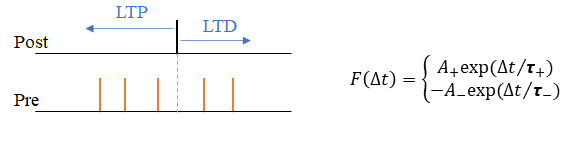

In [11]:
# : The STDP modification function:
from IPython.display import Image 
Image('Images/STDP1.png')

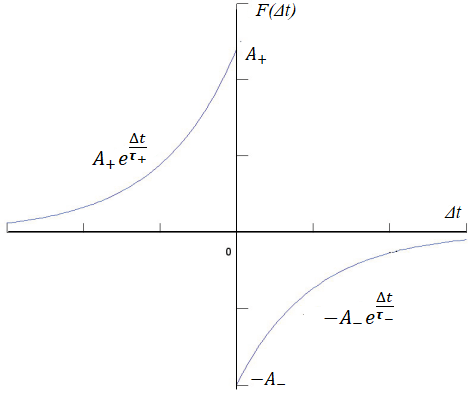

In [12]:
from IPython.display import Image 
Image('Images/STDP1_0.png')

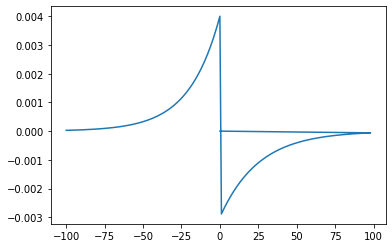

In [25]:
# To show the STDP modification function:

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

def neuron(I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd):
    
    #DEFINE PARAMETERS
    tau = R_m*C_m  #membrane time constant [ms]    

    #DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
    t_vect = np.arange(0,t_end,dt)  #will hold vector of times
    V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
    Input_spikes = np.zeros((1,int(t_end/dt)))#initializing vectors makes your code run faster!
    i = 0   # index denoting which element of V is being assigned
    V_vect[i]=E_L  #first element of V, i.e. value of V at t=0

   #INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
    
    I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
    I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)  
    I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 

    for n in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
        V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
        V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau)
        if (V_vect[0,i+1] > V_th):  #cell spiked
            V_vect[0,i+1] = V_reset;  
            Input_spikes[0,i] = 1
        
        i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step

    return(Input_spikes)

#Define parameters:
t_end = 200
dt = 1
touM = 20
touS = 25
A_inc = 0.004
A_dec = -0.003
W = np.random.rand()
j = 0
i = 0


Input_spikes = neuron(10,20,1,-20,-20,-25,0,200)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
ft_In1 = Input_spikes
Output_spikes = neuron(3,5,1,-55,-70,-75,50,150)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
ft_O1 = Output_spikes
ft_O1[0,100]=1

# We have two neurons: a pre-synaptic neuron and a post-synaptic neuron which are connected to each other by a synaps 'W'.
# We employ STDP and show the synaptic weight changes:

Time = np.zeros((1,200))
DW = np.zeros((1,200))
for tpos in range(int(t_end/dt)-1):
    i = 0
    if (ft_O1[0,j]==1):
        nn = 0
        for tpre in range(int(t_end/dt)-1):
            if (ft_In1[0,i]==1):
                if (tpre-tpos<=0):
                    W = W + A_inc*np.exp((tpre-tpos)/touM)
                    dw = A_inc*np.exp((tpre-tpos)/touM)
                else:
                    W = W + A_dec*np.exp((tpre-tpos)/touS)
                    dw = A_dec*np.exp(-(tpre-tpos)/touS)
            
                if (tpos==100):
                    Time[0,nn] = tpre-tpos
                    DW[0,nn]= dw
                    nn+=1
                                       
            i+=1
    if (tpos==100):
        plt.plot(Time.reshape(Time.shape[1]),DW.reshape(Time.shape[1]))
        plt.show()
            
    j+=1    
    
    

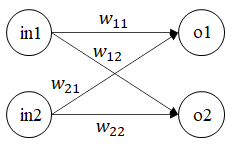

In [14]:
# 2 by 2 network:
from IPython.display import Image 
Image('Images/STDP2.png')

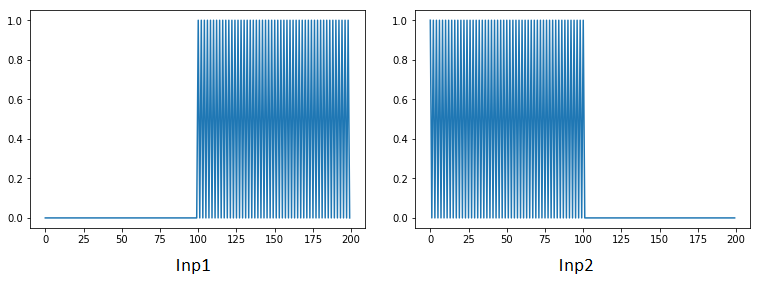

In [15]:
from IPython.display import Image 
Image('Images/Inp.png')


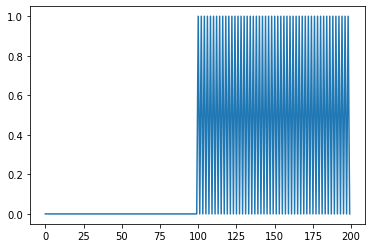

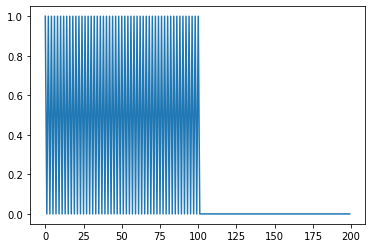

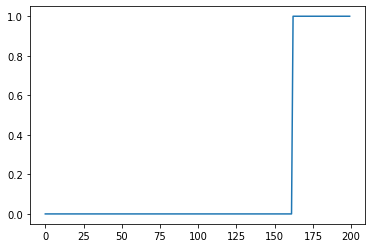

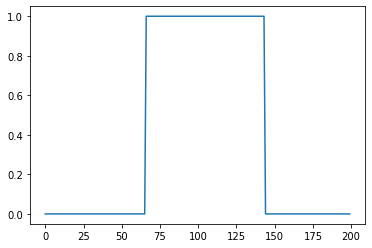

In [27]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

def neuron(I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd):
    
    #DEFINE PARAMETERS
    tau = R_m*C_m  #membrane time constant [ms]    

    #DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
    t_vect = np.arange(0,t_end,dt)  #will hold vector of times
    V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
    Input_spikes = np.zeros((1,int(t_end/dt)))#initializing vectors makes your code run faster!
    i = 0   # index denoting which element of V is being assigned
    V_vect[i]=E_L  #first element of V, i.e. value of V at t=0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
    
    I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
    I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)  
    I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 

    for n in range(int(t_end/dt)-1): 
        V_vect[0,i+1] = V_vect[0,i] + I_e_vect[0,i]
        if (V_vect[0,i+1] > V_th):  #cell spiked
            V_vect[0,i+1] = V_reset;  
            Input_spikes[0,i] = 1
        
        i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step

    return(Input_spikes)

#Define parameters:
# np.random.seed(0)
Num_inp = 2
Num_out = 2
t_end = 200
dt = 1
touM = 15
touS = 20
A_inc = 0.0001
A_dec = -0.0002
V_th = 25
max_epo = 10  #1,  #5,  #10,  #20
Weight = np.zeros((max_epo,Num_inp,Num_out))


# initiall weigths:
# W = 0.3*np.random.random_sample((Num_inp,Num_out))
W = np.zeros((2,2))
W[0,0] = 0.55
W[0,1] = 0.51
W[1,0] = 0.27
W[1,1] = 0.69
j = 0
i = 0
Weight[0,:,:] = W

#Input & output neurons:
ft_In = np.zeros((Num_inp,int(t_end/dt)))
ft_O = np.zeros((Num_out,int(t_end/dt)))
Input_spikes = neuron(4,10,1,-20,-20,-25,100,200)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
ft_In[0,:] = Input_spikes
Input_spikes = neuron(4,10,1,-20,-20,-25,0,100)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
ft_In[1,:] = Input_spikes
   
    

# We have 4 neurons: 2 pre-synaptic neurons and 2 post-synaptic neurons which are connected to each other by synapses 'W'.
# We employ STDP and show the synaptic weight changes:
for epoch in range(max_epo):

    # FeedForward processing:
    ft_O = np.zeros((Num_out,int(t_end/dt)))
    for outs in range(Num_out):
        j = 0
        for t in range(int(t_end/dt)): 
            v = 0
            for ins in range(Num_inp):
                i = 0
                for tt in range(int(t_end/dt)): 
                    if (ft_In[ins,i]==1 and i<=j):
                        v = v + W[ins,outs]
                    i+=1
            if (v>=V_th):
                ft_O[outs,j] = 1
        
            j+=1
            
    # Update processing:        
    for outs in range(Num_out):
        j = 0
        for tpos in range(int(t_end/dt)-1):
            i = 0
            if (ft_O[outs,j]==1):
                for ins in range(Num_inp):
                    i = 0
                    for tpre in range(int(t_end/dt)-1):
                        if (ft_In[ins,i]==1):
                            if (tpre-tpos<=0):
                                W[ins,outs] = W[ins,outs] + A_inc*np.exp((tpre-tpos)/touM)
                            else:
                                W[ins,outs] = W[ins,outs] + A_dec*np.exp(-(tpre-tpos)/touS)
            
                                       
                        i+=1
            
            j+=1    
    
    Weight[epoch,:,:] = W


plt.figure(1)
plt.plot(np.arange(0,t_end,dt),ft_In[0,:]) 
plt.figure(2)
plt.plot(np.arange(0,t_end,dt),ft_In[1,:]) 
plt.figure(3)
plt.plot(np.arange(0,t_end,dt),ft_O[0,:]) 
plt.figure(4)
plt.plot(np.arange(0,t_end,dt),ft_O[1,:])  
    
# plt.figure(5)
# plt.plot(np.arange(0,max_epo,1),Weight[:,0,0]) 
# plt.figure(6)
# plt.plot(np.arange(0,max_epo,1),Weight[:,1,0]) 
# plt.figure(7)
# plt.plot(np.arange(0,max_epo,1),Weight[:,0,1]) 
# plt.figure(8)
# plt.plot(np.arange(0,max_epo,1),Weight[:,1,1]) 


    

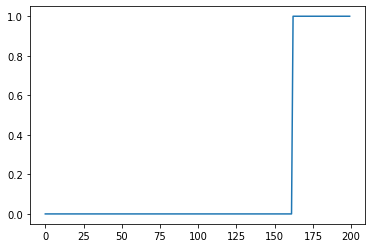

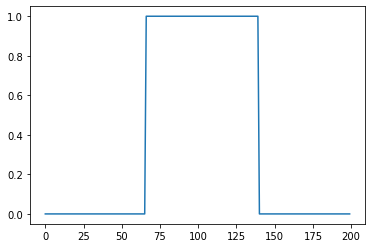

In [7]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

def neuron(I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd):
    
    #DEFINE PARAMETERS
    tau = R_m*C_m  #membrane time constant [ms]    

    #DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
    t_vect = np.arange(0,t_end,dt)  #will hold vector of times
    V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
    Input_spikes = np.zeros((1,int(t_end/dt)))#initializing vectors makes your code run faster!
    i = 0   # index denoting which element of V is being assigned
    V_vect[i]=E_L  #first element of V, i.e. value of V at t=0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
    
    I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
    I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)  
    I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 

    for n in range(int(t_end/dt)-1): 
        V_vect[0,i+1] = V_vect[0,i] + I_e_vect[0,i]
        if (V_vect[0,i+1] > V_th):  #cell spiked
            V_vect[0,i+1] = V_reset;  
            Input_spikes[0,i] = 1
        
        i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step

    return(Input_spikes)

#Define parameters:
# np.random.seed(0)
Num_inp = 2
Num_out = 2
t_end = 200
dt = 1
touM = 15
touS = 20
A_inc = 0.0001
A_dec = -0.0002
V_th = 25
max_epo = 10  #1,  #5,  #10,  #20
Weight = np.zeros((max_epo,Num_inp,Num_out))


# initiall weigths:
# W = 0.3*np.random.random_sample((Num_inp,Num_out))
W = np.zeros((2,2))
W[0,0] = 0.55
W[0,1] = 0.51
W[1,0] = 0.27
W[1,1] = 0.69
j = 0
i = 0
Weight[0,:,:] = W

#Input & output neurons:
ft_In = np.zeros((Num_inp,int(t_end/dt)))
ft_O = np.zeros((Num_out,int(t_end/dt)))
Input_spikes = neuron(4,10,1,-20,-20,-25,100,200)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
ft_In[0,:] = Input_spikes
Input_spikes = neuron(4,10,1,-20,-20,-25,0,100)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
ft_In[1,:] = Input_spikes
   
    

# We have 4 neurons: 2 pre-synaptic neurons and 2 post-synaptic neurons which are connected to each other by synapses 'W'.
# We employ STDP and show the synaptic weight changes:
for epoch in range(max_epo):

    # FeedForward processing:
    ft_O = np.zeros((Num_out,int(t_end/dt)))
    for outs in range(Num_out):
        j = 0
        for t in range(int(t_end/dt)): 
            v = 0
            for ins in range(Num_inp):
                i = 0
                for tt in range(int(t_end/dt)): 
                    if (ft_In[ins,i]==1 and i<=j):
                        v = v + W[ins,outs]
                    i+=1
                    
            if (v>=V_th):
                ft_O[outs,j] = 1
        
            
            
    # Update processing:        

                for ins in range(Num_inp):
                    i = 0
                    for tpre in range(int(t_end/dt)-1):
                        if (ft_In[ins,i]==1):
                            if (tpre-t<=0):
                                W[ins,outs] = W[ins,outs] + A_inc*np.exp((tpre-t)/touM)
                            else:
                                W[ins,outs] = W[ins,outs] + A_dec*np.exp(-(tpre-t)/touS)
            
                                       
                        i+=1
   
            j+=1
    
    Weight[epoch,:,:] = W


# plt.figure(1)
# plt.plot(np.arange(0,t_end,dt),ft_In[0,:]) 
# plt.figure(2)
# plt.plot(np.arange(0,t_end,dt),ft_In[1,:]) 
plt.figure(3)
plt.plot(np.arange(0,t_end,dt),ft_O[0,:]) 
plt.figure(4)
plt.plot(np.arange(0,t_end,dt),ft_O[1,:])  
    
# plt.figure(5)
# plt.plot(np.arange(0,max_epo,1),Weight[:,0,0]) 
# plt.figure(6)
# plt.plot(np.arange(0,max_epo,1),Weight[:,1,0]) 
# plt.figure(7)
# plt.plot(np.arange(0,max_epo,1),Weight[:,0,1]) 
# plt.figure(8)
# plt.plot(np.arange(0,max_epo,1),Weight[:,1,1]) 


    

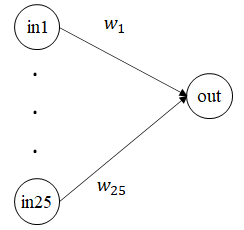

In [18]:
# 25 by 1 network:
from IPython.display import Image 
Image('Images/STDP3.png')

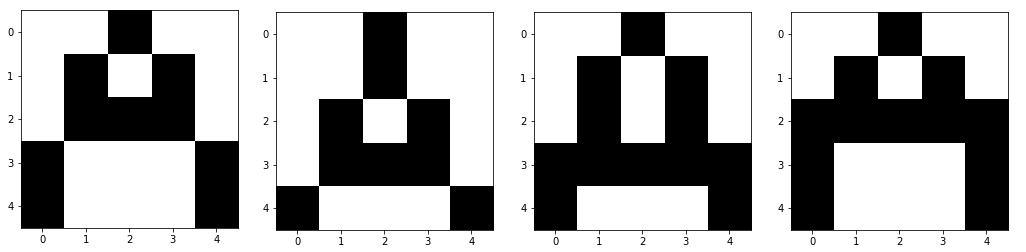

In [19]:
from IPython.display import Image 
Image('Images/A_inp.png')

0
1


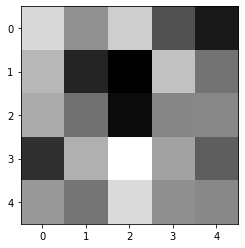

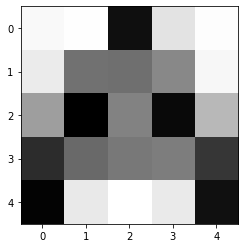

In [28]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#Define  patterns
def pattern_A(n):
    if (n==0):
        ft_In[n,:,:] = np.zeros((Num_inp,int(t_end/dt)))
        Inp[n,:] = np.zeros(Num_inp)
        PR = np.random.poisson(5,int(t_end/dt))
        ft_In[n,2,:][PR>5] = 1
        Inp[n,2] = 1
        ft_In[n,6,:][PR>5] = 1
        Inp[n,6] = 1
        ft_In[n,8,:][PR>5] = 1
        Inp[n,8] = 1
        ft_In[n,11,:][PR>5] = 1
        Inp[n,11] = 1
        ft_In[n,12,:][PR>5] = 1
        Inp[n,12] = 1
        ft_In[n,13,:][PR>5] = 1
        Inp[n,13] = 1
        ft_In[n,15,:][PR>5] = 1
        Inp[n,15] = 1
        ft_In[n,19,:][PR>5] = 1
        Inp[n,19] = 1
        ft_In[n,20,:][PR>5] = 1
        Inp[n,20] = 1
        ft_In[n,24,:][PR>5] = 1
        Inp[n,24] = 1
    elif (n==1):
        ft_In[n,:,:] = np.zeros((Num_inp,int(t_end/dt)))
        Inp[n,:] = np.zeros(Num_inp)
        PR = np.random.poisson(5,int(t_end/dt))
        ft_In[n,2,:][PR>5] = 1
        Inp[n,2] = 1
        ft_In[n,7,:][PR>5] = 1
        Inp[n,7] = 1
        ft_In[n,11,:][PR>5] = 1
        Inp[n,11] = 1
        ft_In[n,13,:][PR>5] = 1
        Inp[n,13] = 1
        ft_In[n,16,:][PR>5] = 1
        Inp[n,16] = 1
        ft_In[n,17,:][PR>5] = 1
        Inp[n,17] = 1
        ft_In[n,18,:][PR>5] = 1
        Inp[n,18] = 1
        ft_In[n,20,:][PR>5] = 1
        Inp[n,20] = 1
        ft_In[n,24,:][PR>5] = 1
        Inp[n,24] = 1
    elif (n==2):
        ft_In[n,:,:] = np.zeros((Num_inp,int(t_end/dt)))
        Inp[n,:] = np.zeros(Num_inp)
        PR = np.random.poisson(5,int(t_end/dt))
        ft_In[n,2,:][PR>5] = 1
        Inp[n,2] = 1
        ft_In[n,7,:][PR>5] = 1
        Inp[n,7] = 1
        ft_In[n,11,:][PR>5] = 1
        Inp[n,11] = 1
        ft_In[n,13,:][PR>5] = 1
        Inp[n,13] = 1
        ft_In[n,15,:][PR>5] = 1
        Inp[n,15] = 1
        ft_In[n,16,:][PR>5] = 1
        Inp[n,16] = 1
        ft_In[n,17,:][PR>5] = 1
        Inp[n,17] = 1
        ft_In[n,18,:][PR>5] = 1
        Inp[n,18] = 1
        ft_In[n,19,:][PR>5] = 1 
        Inp[n,19] = 1
        ft_In[n,20,:][PR>5] = 1
        Inp[n,20] = 1
        ft_In[n,24,:][PR>5] = 1 
        Inp[n,24] = 1
    elif (n==3):
        ft_In[n,:,:] = np.zeros((Num_inp,int(t_end/dt)))
        Inp[n,:] = np.zeros(Num_inp)
        PR = np.random.poisson(5,int(t_end/dt))
        ft_In[n,2,:][PR>5] = 1
        Inp[n,2] = 1
        ft_In[n,6,:][PR>5] = 1
        Inp[n,6] = 1
        ft_In[n,8,:][PR>5] = 1
        Inp[n,8] = 1
        ft_In[n,10,:][PR>5] = 1
        Inp[n,10] = 1
        ft_In[n,11,:][PR>5] = 1
        Inp[n,11] = 1
        ft_In[n,12,:][PR>5] = 1
        Inp[n,12] = 1
        ft_In[n,13,:][PR>5] = 1
        Inp[n,13] = 1
        ft_In[n,14,:][PR>5] = 1
        Inp[n,14] = 1
        ft_In[n,15,:][PR>5] = 1 
        Inp[n,15] = 1
        ft_In[n,19,:][PR>5] = 1
        Inp[n,19] = 1
        ft_In[n,20,:][PR>5] = 1 
        Inp[n,20] = 1  
        ft_In[n,24,:][PR>5] = 1 
        Inp[n,24] = 1           
    return(ft_In[n,:,:],Inp[n])
        

#Define parameters:
Num_inp = 25
Num_out = 1
Num_pat = 4
t_end = 200
dt = 1
touM = 15
touS = 20
A_inc = 0.0001
A_dec = -0.0002
V_th = 20
max_epo = 2
Weight = np.zeros((max_epo,Num_inp,Num_out))
W = 0.1*(np.random.random_sample((Num_inp,Num_out)))
W_int = 0.1*(np.random.random_sample((Num_inp,Num_out)))
j = 0
i = 0
Weight[0,:,:] = W

#Input & output neurons:
Inp = np.zeros((Num_pat,Num_inp))
ft_In = np.zeros((Num_pat,Num_inp,int(t_end/dt)))
ft_O = np.zeros((Num_out,int(t_end/dt)))

for i in range(Num_pat):
    (ft_In[i,:,:],Inp[i]) = pattern_A(i)


# We employ STDP and show the synaptic weight changes:
for epoch in range(max_epo):
    print(epoch)
    for pat in range(Num_pat):
        #####FeedForward processing:
        for outs in range(Num_out):
            j = 0
            for t in range(int(t_end/dt)): 
                v = 0
                for ins in range(Num_inp):
                    i = 0
                    for tt in range(int(t_end/dt)): 
                        if (ft_In[pat,ins,i]==1 and i<=j):
                            v = v + W[ins,outs]
                        i+=1
                if (v>=V_th):
                    ft_O[outs,j] = 1
                j+=1            
        ######################
        for outs in range(Num_out):
            j = 0
            for tpos in range(int(t_end/dt)-1):
                i = 0
                if (ft_O[outs,j]==1):
                    for ins in range(Num_inp):
                        i = 0
                        for tpre in range(int(t_end/dt)-1):
                            if (ft_In[pat,ins,i]==1):
                                if (tpre-tpos<=0):
                                    W[ins,outs] = W[ins,outs] + A_inc*np.exp((tpre-tpos)/touM)
                                else:
                                    W[ins,outs] = W[ins,outs] + A_dec*np.exp(-(tpre-tpos)/touS)

                            i+=1
                j+=1    
    Weight[epoch,:,:] = W         


ww=W_int.T
w=W_int.reshape(1,5,5)
plt.figure(1)
plt.imshow(w.reshape(5,5),'gray')
ww=W.T
w=W.reshape(1,5,5)
plt.figure(2)
plt.imshow(w.reshape(5,5),'gray')
    



In [ ]:
####### Ex4: Change the parameters or input patterns or STDP definition

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#Define  your patterns
def your_pattern(n):
      ###
        
      ###  

#Define parameters:
Num_inp = #
Num_out = 1
Num_pat = #
t_end = 200
dt = 1
touM = #
touS = #
A_inc = #
A_dec = #
V_th = #
max_epo = 4
Weight = np.zeros((max_epo,Num_inp,Num_out))
W = 0.1*(np.random.random_sample((Num_inp,Num_out)))
W_int = 0.1*(np.random.random_sample((Num_inp,Num_out)))
j = 0
i = 0
Weight[0,:,:] = W

######

######

#Input & output neurons:
Inp = np.zeros((Num_pat,Num_inp))
ft_In = np.zeros((Num_pat,Num_inp,int(t_end/dt)))
ft_O = np.zeros((Num_out,int(t_end/dt)))

for i in range(Num_pat):
    (ft_In[i,:,:],Inp[i]) = your_pattern(i)


# We employ STDP and show the synaptic weight changes:
for epoch in range(max_epo):
    print(epoch)
    for pat in range(Num_pat):
        #####FeedForward processing:
        for outs in range(Num_out):
            j = 0
            for t in range(int(t_end/dt)): 
                v = 0
                for ins in range(Num_inp):
                    i = 0
                    for tt in range(int(t_end/dt)): 
                        if (ft_In[pat,ins,i]==1 and i<=j):
                            v = v + W[ins,outs]
                        i+=1
                if (v>=V_th):
                    ft_O[outs,j] = 1
                j+=1            
        ######################
        for outs in range(Num_out):
            j = 0
            for tpos in range(int(t_end/dt)-1):
                i = 0
                if (ft_O[outs,j]==1):
                    for ins in range(Num_inp):
                        i = 0
                        for tpre in range(int(t_end/dt)-1):
                            if (ft_In[pat,ins,i]==1):
                                if (tpre-tpos<=0):
                                    W[ins,outs] = W[ins,outs] + # Other definitions for STDP
                                else:
                                    W[ins,outs] = W[ins,outs] + # Other definitions for STDP 

                            i+=1
                j+=1    
    Weight[epoch,:,:] = W         


ww=W_int.T
w=W_int.reshape(1,5,5)
plt.figure(1)
plt.imshow(w.reshape(5,5),'gray')
ww=W.T
w=W.reshape(1,5,5)
plt.figure(2)
plt.imshow(w.reshape(5,5),'gray')

# Temporal Backpropagation:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

############## Parameters: ##############
thr = [100, 100]  
lr = [0.2, 0.2] 
b = [5, 50]  
a = [0, 0]
lamda=[0,0]
NumOfCatgry = 10
Tend = 255
Tmax = 256

NhidenNeurons = 400
Num_neurons  =784

Nepoch = 200
gamma = 3


############## Preparing filters: ##############

th=[]
to=[]
layer = 0
W0 = (b[layer] - a[layer]) * np.random.random_sample((NhidenNeurons,Num_neurons,1)) + a[layer]
layer = 1
W1 = (b[layer] - a[layer]) * np.random.random_sample((NumOfCatgry,NhidenNeurons,1)) + a[layer]



############## Loading data: ##############
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Images = x_train
Labels = y_train
Images = np.array(Images)
images = []
labels = []
for i in range(len(Labels)):
    if Labels[i] < NumOfCatgry :
        images.append(np.floor(Tend-(np.dot(Images[i],Tend)/255).reshape(1,28,28))) 
        labels.append(Labels[i])          


Images = x_test
Labels = y_test
Images = np.array(Images)
images_test = []
labels_test = []
for i in range(len(Labels)):
    if Labels[i] < NumOfCatgry:
        images_test.append(np.floor(Tend-(np.dot(Images[i],Tend)/255).reshape(1,28,28))) 
        labels_test.append(Labels[i])
        
        
        
############## Defining functions: ##############
## Forward fully connected function:
def Forward_FC(FT, weight, Num_in, Num_out):

    t = cp.mgrid[0:Num_in, 0:1]
    Spikes = cp.zeros((Num_in, 1, Tmax + 1))
    Spikes[t[0], t[1], FT.astype(int)] = 1    
    Voltage = cp.cumsum(cp.tensordot(weight, Spikes), 1)
    Voltage[:,Tmax] = thr[layer] + 1
    ST = (cp.argmax(Voltage>thr[layer],axis=1).astype(float)+1).reshape(Num_out,1) 
    ST[ST>Tmax] = Tmax

    return (ST, Voltage)

## target firing time function:
def target_function(inp, Vinp, correct):

    target = cp.zeros([NumOfCatgry,1])
    minFiring = min(inp)

    if minFiring == Tmax:          
        target[:]=minFiring
        target[labels[iteration]]=minFiring-gamma
        target=target.astype(int)
    else:
        target[:]=inp
        toChange=(inp-minFiring)<gamma
        target[toChange]=min(minFiring+gamma,Tmax)
        target[labels[iteration]]=minFiring

    if minFiring==Tmax:
        V=cp.argmax(Vinp[:,Tmax-3])
        if V==labels[iteration]:
            correct+=1
    else:
        if inp[labels[iteration]]==minFiring:
            correct+=1

    return(target,correct)


## Backprop:
def backward_FC(delta, inp, out, weight, lr, lamda):        
    HF = (inp<out) 
    weight -= (lr*delta)[:,np.newaxis]*HF
#     weight -= lr*lamda*weight 
    Delta = np.sum((weight*delta[:,np.newaxis])*HF,0)
    return(weight,Delta)




############## Training loop: ##############

for epoch in range(Nepoch):
    correct=0.0
    for iteration in range(len(images)): 

######################################################## 
##################### Forward processing: ##############  
########################################################
        layer = 0               
        FiringTime0 = cp.reshape(images[iteration],[Num_neurons,1])        
        (FiringTime1,VoltageH) = Forward_FC(FiringTime0, W0, Num_neurons, NhidenNeurons)

        layer = 1  
        (SpikeTime,VoltageO) = Forward_FC(FiringTime1, W1, NhidenNeurons, NumOfCatgry)

######################################################## 
##################### Find target times: ###############  
########################################################

        (target, correct) = target_function(SpikeTime, VoltageO, correct)

######################################################## 
##################### Backward processing: ##############  
########################################################
       
        layer= 1    
        delta3=((target-SpikeTime)/Tmax)
        norm = cp.linalg.norm(delta3)
        if (norm!=0):
            delta3 = delta3/norm       

        (W1,delta2) = backward_FC(delta3,FiringTime1,SpikeTime[:,np.newaxis],W1,lr[layer],lamda[layer]) 
           

        layer= 0     
        norm = cp.linalg.norm(delta2)
        if (norm!=0):
            delta2 = delta2/norm       
            
        (W0,delta1) = backward_FC(delta2,FiringTime0,FiringTime1[:,cp.newaxis],W0,lr[layer],lamda[layer]) 
       

    print()
    print('perf = ', correct/len(images))

############## Test: ##############

    correct=0
    for iteration in range(len(images_test)): 
        
        layer = 0               
        FiringTime0 = cp.reshape(images_test[iteration],[Num_neurons,1])        
        (FiringTime1,VoltageH) = Forward_FC(FiringTime0, W0, Num_neurons, NhidenNeurons)

        layer = 1  
        (SpikeTime,VoltageO) = Forward_FC(FiringTime1, W1, NhidenNeurons, NumOfCatgry)

        
        winner = cp.argmin(SpikeTime)
        Vwin = cp.argmax(VoltageO[:,SpikeTime[winner].astype(int)])        
        EQ = SpikeTime==SpikeTime[winner]  
        temp = SpikeTime[winner]
        minFiring = min(SpikeTime)
        maxFiring = max(SpikeTime)             

        if minFiring==Tmax:
            V=np.argmax(VoltageO[:,Tmax-3])
            if V==labels_test[iteration]:
                correct+=1
        else:
            if SpikeTime[labels_test[iteration]]==minFiring:
                correct+=1             

    print()
    print('val = ', correct/len(images_test))
 


# BindsNet

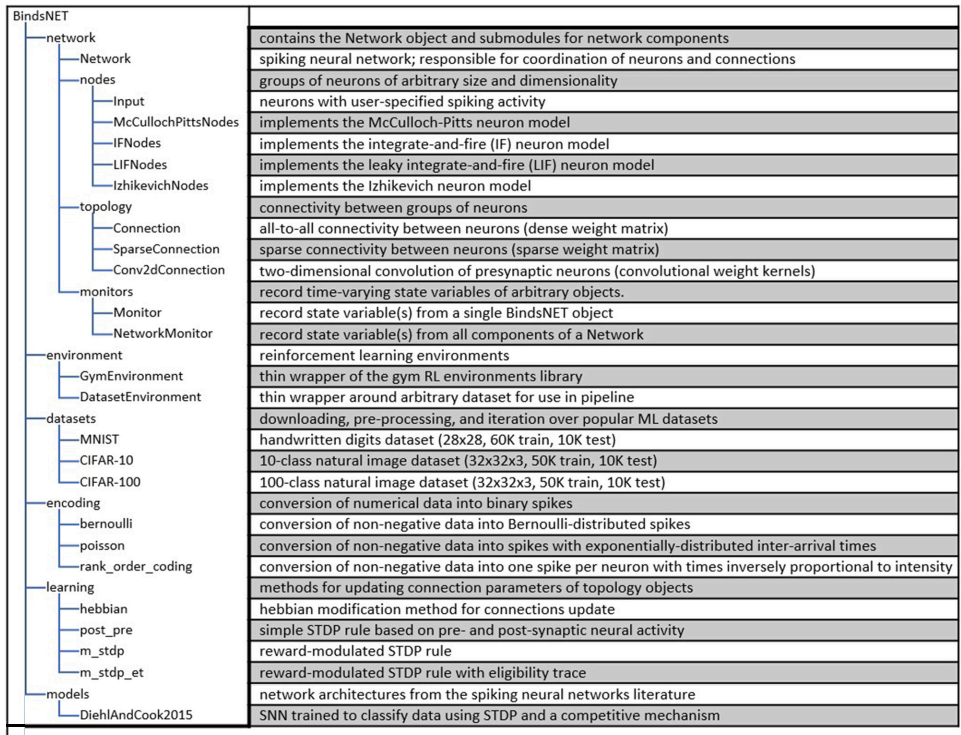

In [22]:
from IPython.display import Image 
Image('Images/BindNet.png')

class NewNodes(Nodes):
def __init__(self, n, shape, traces, ...):
...
def step(self, inpt, dt):
...
def reset_(self):
...

class NewConnection(AbstractConnection):
def __init__(self, source, target, **kwargs):
...
def compute(self, s):
...
def update(self, dt, **kwargs):
...
def normalize(self):
...
def reset_(self):
...

class NewLearningRule(LearningRule):
def __init__(self, connection, nu, weight_decay):
...
def update(self, dt, **kwargs):
...

# Creating a spiking neural network:

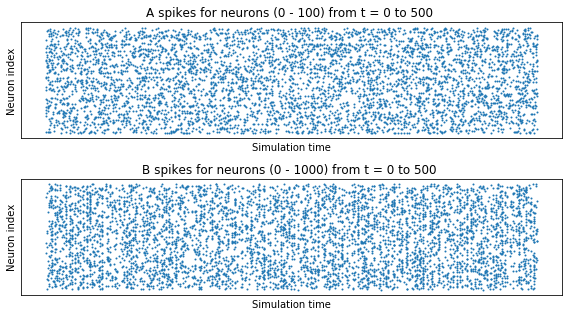

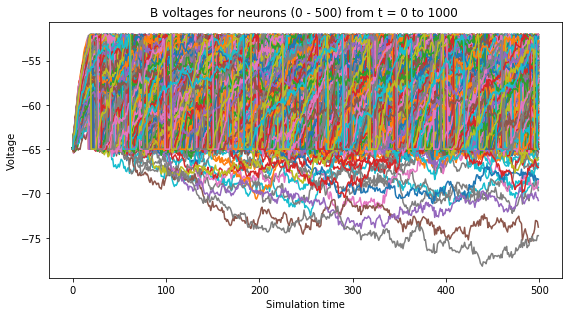

In [29]:
import torch
import matplotlib.pyplot as plt
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.analysis.plotting import plot_spikes, plot_voltages

# Simulation time.
time = 500

# Create the network.
network = Network()

# Create and add input, output layers.
source_layer = Input(n=100)
target_layer = LIFNodes(n=1000)

network.add_layer(layer=source_layer, name="A")
network.add_layer(layer=target_layer, name="B")

# Create connection between input and output layers.
forward_connection = Connection(
source=source_layer,
target=target_layer,
w=0.05 + 0.1 * torch.randn(source_layer.n, target_layer.n))

network.add_connection(connection=forward_connection, source="A", target="B")

# Create recurrent connection in output layer.
recurrent_connection = Connection(
source=target_layer,
target=target_layer,
w=0.025 * (torch.eye(target_layer.n) - 1))

network.add_connection(connection=recurrent_connection, source="B", target="B")

# Create and add input and output layer monitors.
source_monitor = Monitor(
obj=source_layer,
state_vars=("s",), # Record spikes and voltages.
time=time, # Length of simulation (if known ahead of time).
)
target_monitor = Monitor(
obj=target_layer,
state_vars=("s", "v"), # Record spikes and voltages.
time=time, # Length of simulation (if known ahead of time).
)
network.add_monitor(monitor=source_monitor, name="A")
network.add_monitor(monitor=target_monitor, name="B")

# Create input spike data, where each spike is distributed according to Bernoulli(0.1).
input_data = torch.bernoulli(0.1 * torch.ones(time, source_layer.n)).byte()
inputs = {"A": input_data}

# Simulate network on input data.
network.run(inputs=inputs, time=time)
# Retrieve and plot simulation spike, voltage data from monitors.
spikes = {
"A": source_monitor.get("s"), "B": target_monitor.get("s")
}
voltages = {"B": target_monitor.get("v")}
plt.ioff()
plot_spikes(spikes)
plot_voltages(voltages, plot_type="line")
plt.show()

# Creating a learning rule:

In [ ]:
from bindsnet.network.nodes import Input, LIFNodes
from bindsnet.network.topology import Connection
from bindsnet.learning import PostPre

# Create and add input, output layers.
source_layer = Input(n=100, traces=True)
target_layer = LIFNodes(n=1000, traces=True)

network.add_layer(layer=source_layer, name="A")
network.add_layer(layer=target_layer, name="B")

# Connect the two layers.
connection = Connection(source=source_layer, target=target_layer, update_rule=PostPre, nu=(1e-4, 1e-2))


# MNIST example

In [ ]:
import torch
import argparse
import matplotlib.pyplot as plt
from torchvision import transforms

from time import time as t
from tqdm import tqdm

from bindsnet.network import Network
from bindsnet.datasets import MNIST
from bindsnet.encoding import PoissonEncoder
from bindsnet.learning import PostPre
from bindsnet.network.monitors import Monitor
from bindsnet.network.nodes import DiehlAndCookNodes, Input
from bindsnet.network.topology import Conv2dConnection, Connection
from bindsnet.analysis.plotting import (
    plot_input,
    plot_spikes,
    plot_conv2d_weights,
    plot_voltages,
)


# Define parameters:

seed = 0
n_epochs = 1
kernel_size =16
stride = 4
n_filters = 25
padding = 0
time = 50
dt = 1.0
intensity = 128.0
train = True
plot = True
torch.manual_seed(seed)

conv_size = int((28 - kernel_size + 2 * padding) / stride) + 1


##############################
####### Build network: #######
network = Network()

input_layer = Input(n=784, shape=(1, 28, 28), traces=True)

conv_layer = DiehlAndCookNodes(
    n=n_filters * conv_size * conv_size,
    shape=(n_filters, conv_size, conv_size),
    traces=True,
)

conv_conn = Conv2dConnection(
    input_layer,
    conv_layer,
    kernel_size=kernel_size,
    stride=stride,
    update_rule=PostPre,
    norm=0.4 * kernel_size ** 2,
    nu=[1e-4, 1e-2],
    wmax=1.0,
)

w = torch.zeros(n_filters, conv_size, conv_size, n_filters, conv_size, conv_size)
for fltr1 in range(n_filters):
    for fltr2 in range(n_filters):
        if fltr1 != fltr2:
            for i in range(conv_size):
                for j in range(conv_size):
                    w[fltr1, i, j, fltr2, i, j] = -100.0

w = w.view(n_filters * conv_size * conv_size, n_filters * conv_size * conv_size)

recurrent_conn = Connection(conv_layer, conv_layer, w=w)

network.add_layer(input_layer, name="X")
network.add_layer(conv_layer, name="Y")
network.add_connection(conv_conn, source="X", target="Y")
network.add_connection(recurrent_conn, source="Y", target="Y")


# Load MNIST data.
train_dataset = MNIST(
    PoissonEncoder(time=time, dt=dt),
    None,
    "../../data/MNIST",
    download=True,
    train=True,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Lambda(lambda x: x * intensity)]
    ),
)

# Record state variables:
spikes = {}
for layer in set(network.layers):
    spikes[layer] = Monitor(network.layers[layer], state_vars=["s"], time=time)
    network.add_monitor(spikes[layer], name="%s_spikes" % layer)

voltages = {}
for layer in set(network.layers) - {"X"}:
    voltages[layer] = Monitor(network.layers[layer], state_vars=["v"], time=time)
    network.add_monitor(voltages[layer], name="%s_voltages" % layer)


##################################
####### Train the network: #######
print("Begin training.\n")

inpt_axes = None
inpt_ims = None
spike_ims = None
spike_axes = None
weights1_im = None
voltage_ims = None
voltage_axes = None

for epoch in range(n_epochs):

    train_dataloader = torch.utils.data.DataLoader(
        train_dataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=False
    )

    for step, batch in enumerate(tqdm(train_dataloader)):
        # Get next input sample.

        inputs = {"X": batch["encoded_image"].view(time, 1, 1, 28, 28)}
        label = batch["label"]

        # Run the network on the input.
        network.run(inputs=inputs, time=time, input_time_dim=1)

        # Optionally plot various simulation information.
        if plot:
            image = batch["image"].view(28, 28)

            inpt = inputs["X"].view(time, 784).sum(0).view(28, 28)
            weights1 = conv_conn.w
            _spikes = {
                "X": spikes["X"].get("s").view(time, -1),
                "Y": spikes["Y"].get("s").view(time, -1),
            }
            #_voltages = {"Y": voltages["Y"].get("v").view(time, -1)}

            inpt_axes, inpt_ims = plot_input(
                image, inpt, label=label, axes=inpt_axes, ims=inpt_ims
            )
            #spike_ims, spike_axes = plot_spikes(_spikes, ims=spike_ims, axes=spike_axes)
            weights1_im = plot_conv2d_weights(weights1, im=weights1_im)
            #voltage_ims, voltage_axes = plot_voltages(
                #_voltages, ims=voltage_ims, axes=voltage_axes
            #)

            plt.pause(1)

        network.reset_state_variables()  # Reset state variables.
        
print("Training complete.\n")


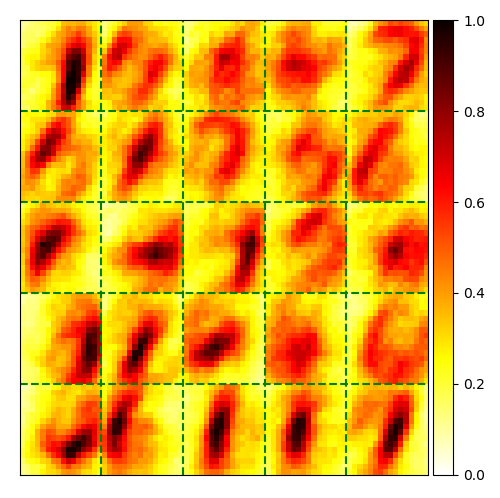

In [4]:
from IPython.display import Image 
Image('Images/Features.png')

In [ ]:
####### Ex5:  Create your own network


import torch
import argparse
import matplotlib.pyplot as plt
from torchvision import transforms

from time import time as t
from tqdm import tqdm

from bindsnet.datasets import MNIST
from bindsnet.encoding import #
from bindsnet.network import Network
from bindsnet.learning import #
from bindsnet.network.monitors import Monitor
from bindsnet.network.nodes import #
from bindsnet.network.topology import #
from bindsnet.analysis.plotting import (
    plot_input,
    plot_spikes,
    plot_conv2d_weights,
    plot_voltages,
)


# Define parameters:

seed = 0
n_epochs = 1
kernel_size = #
stride = #
n_filters = #
padding = #
time = #
dt = #
intensity = 128.0
progress_interval = 10
update_interval = 250
train = True
plot = True
torch.manual_seed(seed)

conv_size = int((28 - kernel_size + 2 * padding) / stride) + 1
per_class = int((n_filters * conv_size * conv_size) / 10)


##############################
####### Build network: #######
network = Network()

# Create the layers

#Create the connections

###
w = torch.zeros(n_filters, conv_size, conv_size, n_filters, conv_size, conv_size)
for fltr1 in range(n_filters):
    for fltr2 in range(n_filters):
        if fltr1 != fltr2:
            for i in range(conv_size):
                for j in range(conv_size):
                    w[fltr1, i, j, fltr2, i, j] = -100.0

w = w.view(n_filters * conv_size * conv_size, n_filters * conv_size * conv_size)
recurrent_conn = Connection(conv_layer, conv_layer, w=w)
###

# Add layers 

# Add connections


# Load MNIST data.
train_dataset = MNIST(
    PoissonEncoder(time=time, dt=dt),
    None,
    "../../data/MNIST",
    download=True,
    train=True,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Lambda(lambda x: x * intensity)]
    ),
)

###
# Record state variables:
spikes = {}
for layer in set(network.layers):
    spikes[layer] = Monitor(network.layers[layer], state_vars=["s"], time=time)
    network.add_monitor(spikes[layer], name="%s_spikes" % layer)

voltages = {}
for layer in set(network.layers) - {"X"}:
    voltages[layer] = Monitor(network.layers[layer], state_vars=["v"], time=time)
    network.add_monitor(voltages[layer], name="%s_voltages" % layer)
    
voltage_monitor = Monitor(network.layers["Y"], ["v"], time=time)
network.add_monitor(voltage_monitor, name="output_voltage")
###


##################################
####### Train the network: #######
print("Begin training.\n")

###
inpt_axes = None
inpt_ims = None
spike_ims = None
spike_axes = None
weights1_im = None
voltage_ims = None
voltage_axes = None
###

for epoch in range(n_epochs):

    train_dataloader = torch.utils.data.DataLoader(
        train_dataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=False
    )

    for step, batch in enumerate(tqdm(train_dataloader)):
        # Get next input sample.

        inputs = {"X": batch["encoded_image"].view(time, 1, 1, 28, 28)}
        label = batch["label"]

        # Run the network on the input.
        network.run(inputs=inputs, time=time, input_time_dim=1)

        # Optionally plot various simulation information.
        if plot:
            
            ###
            image = batch["image"].view(28, 28)
            inpt = inputs["X"].view(time, 784).sum(0).view(28, 28)
            weights1 = conv_conn.w
            _spikes = {
                "X": spikes["X"].get("s").view(time, -1),
                "Y": spikes["Y"].get("s").view(time, -1),
            }
            
            inpt_axes, inpt_ims = plot_input(image, inpt, label=label, axes=inpt_axes, ims=inpt_ims)
            weights1_im = plot_conv2d_weights(weights1, im=weights1_im)
            ###
            
            plt.pause(1)

        network.reset_state_variables()  # Reset state variables.
        
print("Training complete.\n")


# - Neuron models
# - STDP
# - BindsNet software

# Neuron models:


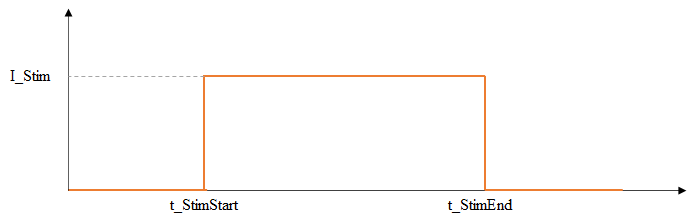

In [5]:
#LIF Neuron with constant input current:
from IPython.display import Image 
Image('Images/LIF_C_I.png')

Text(0, 0.5, 'Voltage in mV')

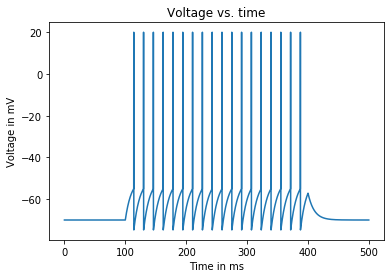

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 0.1            #time step [ms]
t_end = 500         #total time of run [ms]
t_StimStart = 100   #time to start injecting current [ms]
t_StimEnd = 400     #time to end injecting current [ms]
E_L = -70           #resting membrane potential [mV]
V_th = -55          #spike threshold [mV]
V_reset = -75       #value to reset voltage to after a spike [mV]
V_spike = 20        #value to draw a spike to, when cell spikes [mV]
R_m = 10            #membrane resistance [KOhm]
C_m = 1             #capacitance (uF)
tau = R_m*C_m       #membrane time constant [ms]

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0
I_Stim = 2;  #magnitude of pulse of injected current [nA]
I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)   #add portion from 
# t=t_StimStart to t=t_StimEnd
I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 
#t=t_StimEnd to t=t_end
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m==> V(t+1)=v(0) + (v(t)-v(0))*exp(-dt.tau)
for n in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
    V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
    V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage
        
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
#MAKE PLOTS

plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')


In [ ]:
####### Ex1: Change the parameters


from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 0.1  #time step [ms]
t_end = #           #total time of run [ms]
t_StimStart = #     #time to start injecting current [ms]
t_StimEnd = #       #time to end injecting current [ms]
E_L = #             #resting membrane potential [mV]
V_th = #            #spike threshold [mV]
V_reset = #         #value to reset voltage to after a spike [mV]
V_spike = #          #value to draw a spike to, when cell spikes [mV]
R_m = #              #membrane resistance [KOhm]
C_m = #              #capacitance (uF)
tau = R_m*C_m       #membrane time constant [ms]

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0
I_Stim = #       #magnitude of pulse of injected current [nA]
I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)   #add portion from 
# t=t_StimStart to t=t_StimEnd
I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 
#t=t_StimEnd to t=t_end
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
for n in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
    V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
    V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage
        
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
#MAKE PLOTS

plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')


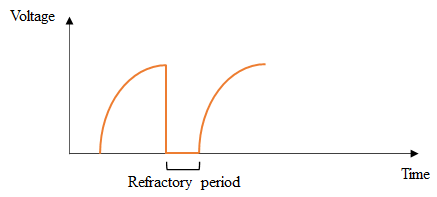

In [6]:
# LIF Neuron with Constant input current and refractory period:
from IPython.display import Image 
Image('Images/LIF_CI_R.png')

Text(0, 0.5, 'Voltage in mV')

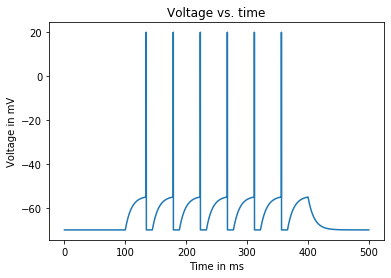

In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 0.1            #time step [ms]
t_end = 500         #total time of run [ms]
t_StimStart = 100   #time to start injecting current [ms]
t_StimEnd = 400     #time to end injecting current [ms]
E_L = -70           #resting membrane potential [mV]
V_th = -55          #spike threshold [mV]
V_reset = -75       #value to reset voltage to after a spike [mV]
V_spike = 20        #value to draw a spike to, when cell spikes [mV]
R_m = 10            #membrane resistance [KOhm]
C_m = 1             #capacitance (uF)
tau = R_m*C_m       #membrane time constant [ms]
tau_ref = 100         # refractory period (msec)
t_rest = 0

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0
I_Stim = 1.55;  #magnitude of pulse of injected current [nA]
I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)   #add portion from 
# t=t_StimStart to t=t_StimEnd
I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 
#t=t_StimEnd to t=t_end
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
for n in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms
    if n > t_rest:
        V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 

        V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
        t_rest = n + tau_ref
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage
                
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
#MAKE PLOTS

plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')


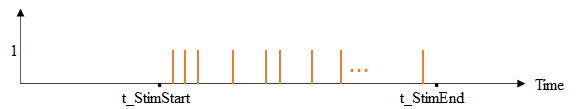

In [7]:
# LIF Neuron with spiking inputs:
from IPython.display import Image 
Image('Images/LIF_S_I.png')

Text(0, 0.5, 'Spike times')

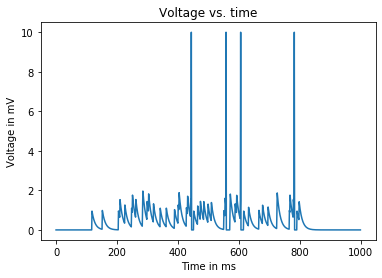

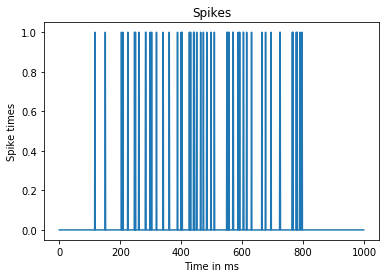

In [5]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 1  #time step [ms]
t_end = 1000  #total time of run [ms]
t_StimStart = 100  #time to start injecting current [ms]
t_StimEnd = 800  #time to end injecting current [ms]
E_L = 0  #resting membrane potential [mV]
V_th = 2  #spike threshold [mV]
V_reset = 0  #value to reset voltage to after a spike [mV]s [mV]
V_spike = 10
R_m = 10  #membrane resistance [KOhm]
C_m = 1 # capacitance (uF)
tau = R_m*C_m #membrane time constant [ms]

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0


I_Stim = np.random.randint(t_StimStart,t_StimEnd,50)  
I_Stim = np.sort(I_Stim)
I_Stim = np.unique(I_Stim)
I_e_vect = np.zeros((1,int(t_end/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
n = 0
for j in range(int(t_end/dt)):
    if (n<len(I_Stim)):
        if (j==I_Stim[n]):
            I_e_vect[0,j] = 1
            n+=1    
        else:
            I_e_vect[0,j] = 0
    else:
            I_e_vect[0,j] = 0
            


V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
for t in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
    V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
    V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage      
        
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
    
#MAKE PLOTS
plt.figure(1)
plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')
plt.figure(2)
plt.plot(t_vect, I_e_vect.reshape(len(t_vect)))
title('Spikes')
xlabel('Time in ms')
ylabel('Spike times')



In [ ]:
####### Ex2: Change the parameters

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 1  #time step [ms]
t_end = #           #total time of run [ms]
t_StimStart = #     #time to start injecting current [ms]
t_StimEnd = #       #time to end injecting current [ms]
E_L = #             #resting membrane potential [mV]
V_th = #            #spike threshold [mV]
V_reset = #         #value to reset voltage to after a spike [mV]s [mV]
V_spike = #
R_m = #             #membrane resistance [KOhm]
C_m = #             #capacitance (uF)
tau = R_m*C_m       #membrane time constant [ms]

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)  #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0   # index denoting which element of V is being assigned
V_vect[i]=E_L  #first element of V, i.e. value of V at t=0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
I_Stim = np.random.randint(t_StimStart,t_StimEnd,100)  
I_Stim = np.sort(I_Stim)
I_Stim = np.unique(I_Stim)
I_e_vect = np.zeros((1,int(t_end/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
n = 0
for j in range(int(t_end/dt)):
    if (n<len(I_Stim)):
        if (j==I_Stim[n]):
            I_e_vect[0,j] = 1
            n+=1    
        else:
            I_e_vect[0,j] = 0
    else:
            I_e_vect[0,j] = 0
            


V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0
for t in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
    V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
    V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau); 
    #if statement below says what to do if voltage crosses threshold
    if (V_vect[0,i+1] > V_th):  #cell spiked
        V_vect[0,i+1] = V_reset;  #set voltage back to V_reset
        V_plot_vect[0,i+1] = V_spike;   #set vector that will be plotted to show a spike here
        NumSpikes = NumSpikes + 1;    #add 1 to the total spike count
    else:  #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i+1];   #plot the actual voltage      
        
    i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step
    
#MAKE PLOTS
plt.figure(1)
plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')
plt.figure(2)
plt.plot(t_vect, I_e_vect.reshape(len(t_vect)))
title('Spikes')
xlabel('Time in ms')
ylabel('Spike times')



Text(0, 0.5, 'Spike times')

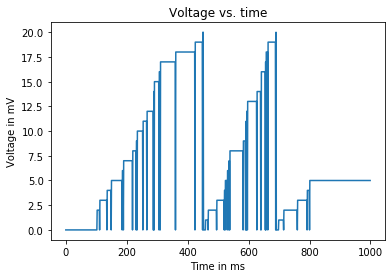

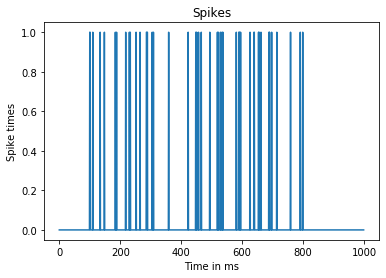

In [6]:
########################## IF Neuron with spiking inputs: ##########################

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 1               #time step [ms]
t_end = 1000         #total time of run [ms]
t_StimStart = 100    #time to start injecting current [ms]
t_StimEnd = 800      #time to end injecting current [ms]
E_L = 0              #resting membrane potential [mV]
V_th = 20            #spike threshold [mV]
V_reset = 0          #value to reset voltage to after a spike [mV]


#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)       #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
i = 0           # index denoting which element of V is being assigned
V_vect[i]=E_L   #first element of V, i.e. value of V at t=0

#Generate the input spike times
I_Stim = np.random.randint(t_StimStart,t_StimEnd,50)  
I_Stim = np.sort(I_Stim)
I_Stim = np.unique(I_Stim)
I_e_vect = np.zeros((1,int(t_end/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
n = 0
for j in range(int(t_end/dt)):
    if (n<len(I_Stim)):
        if (j==I_Stim[n]):
            I_e_vect[0,j] = 1
            n+=1    
        else:
            I_e_vect[0,j] = 0
    else:
            I_e_vect[0,j] = 0
        

#The IF neuron
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0
for t in range(int(t_end/dt)-1):            #loop through values of t in steps of dt ms 
    if (I_e_vect[0,i]==1):        
        V_vect[0,i+1] = V_vect[0,i] + 1 
      #if statement below says what to do if voltage crosses threshold
        if (V_vect[0,i+1] > V_th):          #cell spiked
            V_vect[0,i+1] = V_reset;        #set voltage back to V_reset
            V_plot_vect[0,i+1] = V_reset;   #set vector that will be plotted to show a spike here
            NumSpikes = NumSpikes + 1;      #add 1 to the total spike count
    else:                                   #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i];   #plot the actual voltage
        V_vect[0,i+1] = V_vect[0,i]
    i = i + 1;                              #add 1 to index, corresponding to moving forward 1 time step
    
#MAKE PLOTS
plt.figure(1)
plt.plot(t_vect, V_plot_vect.reshape(len(t_vect)))
title('Voltage vs. time')
xlabel('Time in ms')
ylabel('Voltage in mV')
plt.figure(2)
plt.plot(t_vect, I_e_vect.reshape(len(t_vect)))
title('Spikes')
xlabel('Time in ms')
ylabel('Spike times')


In [ ]:
####### Ex3: Change the parameters

########################## IF Neuron with spiking inputs: ##########################

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#DEFINE PARAMETERS
dt = 1               #time step [ms]
t_end = #            #total time of run [ms]
t_StimStart = #      #time to start injecting current [ms]
t_StimEnd = #        #time to end injecting current [ms]
E_L = #              #resting membrane potential [mV]
V_th = #             #spike threshold [mV]
V_reset = #          #value to reset voltage to after a spike [mV]
randV = #

#DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
t_vect = np.arange(0,t_end,dt)       #will hold vector of times
V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector

#initializing vectors makes your code run faster!
i = 0           # index denoting which element of V is being assigned
V_vect[i]=E_L   #first element of V, i.e. value of V at t=0

#Generate the input spike times
I_Stim = np.random.randint(t_StimStart,t_StimEnd,randV)  
I_Stim = np.sort(I_Stim)
I_Stim = np.unique(I_Stim)
I_e_vect = np.zeros((1,int(t_end/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
n = 0
for j in range(int(t_end/dt)):
    if (n<len(I_Stim)):
        if (j==I_Stim[n]):
            I_e_vect[0,j] = 1
            n+=1    
        else:
            I_e_vect[0,j] = 0
    else:
            I_e_vect[0,j] = 0
        

#The IF neuron
V_plot_vect = np.zeros((1,len(t_vect)))
V_plot_vect[0,i] = V_vect[0,i]
NumSpikes = 0
for t in range(int(t_end/dt)-1):            #loop through values of t in steps of dt ms 
    if (I_e_vect[0,i]==1):        
        V_vect[0,i+1] = V_vect[0,i] + 1 
      #if statement below says what to do if voltage crosses threshold
        if (V_vect[0,i+1] > V_th):          #cell spiked
            V_vect[0,i+1] = V_reset;        #set voltage back to V_reset
            V_plot_vect[0,i+1] = V_reset;   #set vector that will be plotted to show a spike here
            NumSpikes = NumSpikes + 1;      #add 1 to the total spike count
    else:                                   #voltage didn't cross threshold so cell does not spike
        V_plot_vect[0,i+1] = V_vect[0,i];   #plot the actual voltage
        V_vect[0,i+1] = V_vect[0,i]
    i = i + 1;                              #add 1 to index, corresponding to moving forward 1 time step
    
#MAKE PLOTS

# STDP:

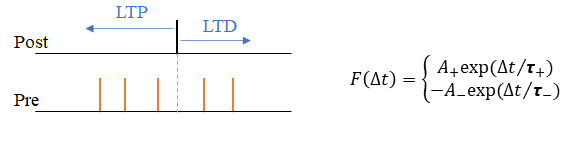

In [10]:
# : The STDP modification function:
from IPython.display import Image 
Image('Images/STDP1.png')

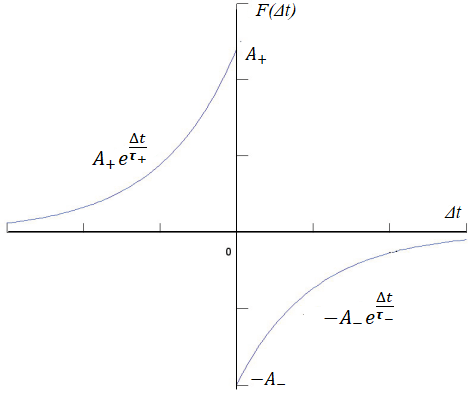

In [11]:
from IPython.display import Image 
Image('Images/STDP1_0.png')

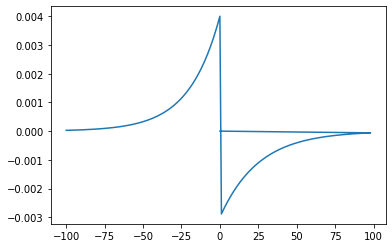

In [8]:
# To show the STDP modification function:

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

def neuron(I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd):
    
    #DEFINE PARAMETERS
    tau = R_m*C_m  #membrane time constant [ms]    

    #DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
    t_vect = np.arange(0,t_end,dt)  #will hold vector of times
    V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
    Input_spikes = np.zeros((1,int(t_end/dt)))#initializing vectors makes your code run faster!
    i = 0   # index denoting which element of V is being assigned
    V_vect[i]=E_L  #first element of V, i.e. value of V at t=0

   #INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
    
    I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
    I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)  
    I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 

    for n in range(int(t_end/dt)-1):   #loop through values of t in steps of dt ms 
        V_inf = E_L + I_e_vect[0,i]*R_m; #value that V_vect is exponentially 
        V_vect[0,i+1] = V_inf + (V_vect[0,i] - V_inf)*np.exp(-dt/tau)
        if (V_vect[0,i+1] > V_th):  #cell spiked
            V_vect[0,i+1] = V_reset;  
            Input_spikes[0,i] = 1
        
        i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step

    return(Input_spikes)

#Define parameters:
t_end = 200
dt = 1
touM = 20
touS = 25
A_inc = 0.004
A_dec = -0.003
W = np.random.rand()
j = 0
i = 0


ft_In1 = neuron(10,20,1,-20,-20,-25,0,200) #Input_spikes = neuron(10,20,1,-20,-20,-25,0,200)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
#ft_In1 = Input_spikes
ft_O1 = neuron(3,5,1,-55,-70,-75,50,150) #Output_spikes = neuron(3,5,1,-55,-70,-75,50,150)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
#ft_O1 = Output_spikes
ft_O1[0,100]=1

# We have two neurons: a pre-synaptic neuron and a post-synaptic neuron which are connected to each other by a synaps 'W'.
# We employ STDP and show the synaptic weight changes:

Time = np.zeros((1,200))
DW = np.zeros((1,200))
for tpos in range(int(t_end/dt)-1):
    i = 0
    if (ft_O1[0,j]==1):
        nn = 0
        for tpre in range(int(t_end/dt)-1):
            if (ft_In1[0,i]==1):
                if (tpre-tpos<=0):
                    W = W + A_inc*np.exp((tpre-tpos)/touM)
                    dw = A_inc*np.exp((tpre-tpos)/touM)
                else:
                    W = W + A_dec*np.exp((tpre-tpos)/touS)
                    dw = A_dec*np.exp(-(tpre-tpos)/touS)
            
                if (tpos==100):
                    Time[0,nn] = tpre-tpos
                    DW[0,nn]= dw
                    nn+=1
                                       
            i+=1
    if (tpos==100):
        plt.plot(Time.reshape(Time.shape[1]),DW.reshape(Time.shape[1]))
        plt.show()
            
    j+=1    
    
    

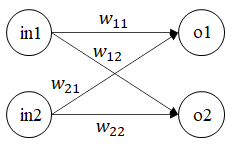

In [17]:
# 2 by 2 network:
from IPython.display import Image 
Image('Images/STDP2.png')

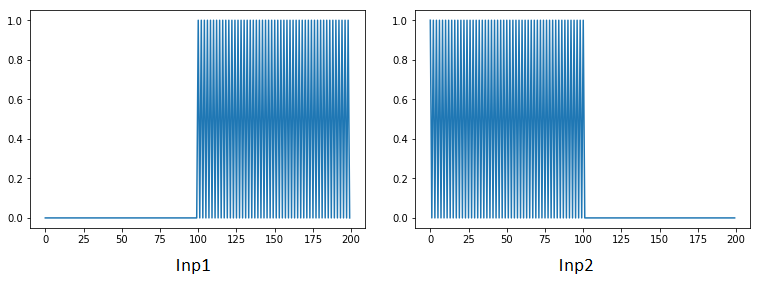

In [20]:
from IPython.display import Image 
Image('Images/Inp.png')


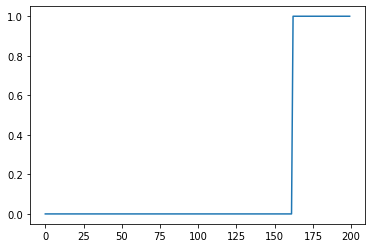

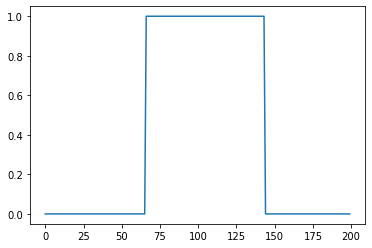

In [11]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

def neuron(I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd):
    
    #DEFINE PARAMETERS
    tau = R_m*C_m  #membrane time constant [ms]    

    #DEFINE INITIAL VALUES AND VECTORS TO HOLD RESULTS
    t_vect = np.arange(0,t_end,dt)  #will hold vector of times
    V_vect = np.zeros((1,len(t_vect)));  #initialize the voltage vector
    Input_spikes = np.zeros((1,int(t_end/dt)))#initializing vectors makes your code run faster!
    i = 0   # index denoting which element of V is being assigned
    V_vect[i]=E_L  #first element of V, i.e. value of V at t=0

#INTEGRATE THE EQUATION tau*dV/dt = -V + E_L + I_e*R_m
    
    I_e_vect = np.zeros((1,int(t_StimStart/dt)))   #portion of I_e_vect fromt=0 to t=t_StimStart
    I_e_vect = np.concatenate((I_e_vect,I_Stim*np.ones((1,1+int((t_StimEnd-t_StimStart)/dt)))),axis=1)  
    I_e_vect = np.concatenate((I_e_vect,np.zeros((1,int((t_end-t_StimEnd)/dt)))),axis=1)    #add portion from 

    for n in range(int(t_end/dt)-1): 
        V_vect[0,i+1] = V_vect[0,i] + I_e_vect[0,i]
        if (V_vect[0,i+1] > V_th):  #cell spiked
            V_vect[0,i+1] = V_reset;  
            Input_spikes[0,i] = 1
        
        i = i + 1;  #add 1 to index, corresponding to moving forward 1 time step

    return(Input_spikes)

#Define parameters:
# np.random.seed(0)
Num_inp = 2
Num_out = 2
t_end = 200
dt = 1
touM = 15
touS = 20
A_inc = 0.0001
A_dec = -0.0002
V_th = 25
max_epo = 10  #1,  #5,  #10,  #20
Weight = np.zeros((max_epo,Num_inp,Num_out))


# initiall weigths:
# W = 0.3*np.random.random_sample((Num_inp,Num_out))
W = np.zeros((2,2))
W[0,0] = 0.55
W[0,1] = 0.51
W[1,0] = 0.27
W[1,1] = 0.69
j = 0
i = 0
Weight[0,:,:] = W

#Input & output neurons:
ft_In = np.zeros((Num_inp,int(t_end/dt)))
ft_O = np.zeros((Num_out,int(t_end/dt)))
ft_In[0,:] = neuron(4,10,1,-20,-20,-25,100,200)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd
# ft_In[0,:] = Input_spikes
ft_In[1,:] = neuron(4,10,1,-20,-20,-25,0,100)  #I_Stim,R_m,C_m,V_th,E_L,V_reset,t_StimStart,t_StimEnd

   
    

# We have 4 neurons: 2 pre-synaptic neurons and 2 post-synaptic neurons which are connected to each other by synapses 'W'.
# We employ STDP and show the synaptic weight changes:
for epoch in range(max_epo):

    # FeedForward processing:
    ft_O = np.zeros((Num_out,int(t_end/dt)))
    for outs in range(Num_out):
        j = 0
        for t in range(int(t_end/dt)): 
            v = 0
            for ins in range(Num_inp):
                i = 0
                for tt in range(int(t_end/dt)): 
                    if (ft_In[ins,i]==1 and i<=j):
                        v = v + W[ins,outs]
                    i+=1
            if (v>=V_th):
                ft_O[outs,j] = 1
        
            j+=1
            
    # Update processing:        
    for outs in range(Num_out):
        j = 0
        for tpos in range(int(t_end/dt)-1):
            i = 0
            if (ft_O[outs,j]==1):
                for ins in range(Num_inp):
                    i = 0
                    for tpre in range(int(t_end/dt)-1):
                        if (ft_In[ins,i]==1):
                            if (tpre-tpos<=0):
                                W[ins,outs] = W[ins,outs] + A_inc*np.exp((tpre-tpos)/touM)
                            else:
                                W[ins,outs] = W[ins,outs] + A_dec*np.exp(-(tpre-tpos)/touS)
            
                                       
                        i+=1
            
            j+=1    
    
    Weight[epoch,:,:] = W


# plt.figure(1)
# plt.plot(np.arange(0,t_end,dt),ft_In[0,:]) 
# plt.figure(2)
# plt.plot(np.arange(0,t_end,dt),ft_In[1,:]) 
plt.figure(3)
plt.plot(np.arange(0,t_end,dt),ft_O[0,:]) 
plt.figure(4)
plt.plot(np.arange(0,t_end,dt),ft_O[1,:])  
    
# plt.figure(5)
# plt.plot(np.arange(0,max_epo,1),Weight[:,0,0]) 
# plt.figure(6)
# plt.plot(np.arange(0,max_epo,1),Weight[:,1,0]) 
# plt.figure(7)
# plt.plot(np.arange(0,max_epo,1),Weight[:,0,1]) 
# plt.figure(8)
# plt.plot(np.arange(0,max_epo,1),Weight[:,1,1]) 


    

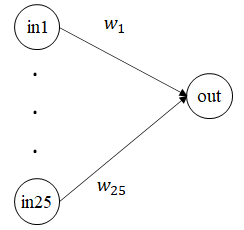

In [52]:
# 25 by 1 network:
from IPython.display import Image 
Image('Images/STDP3.png')

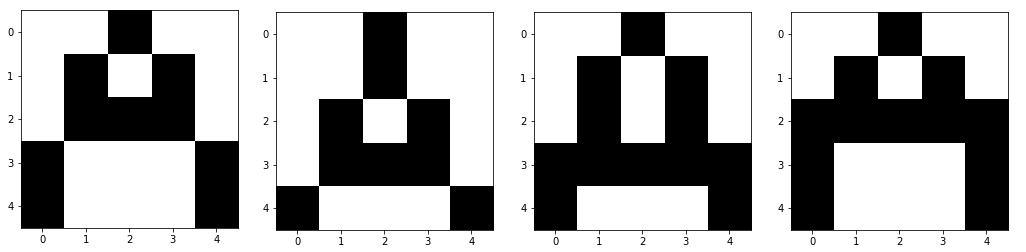

In [46]:
from IPython.display import Image 
Image('Images/A_inp.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


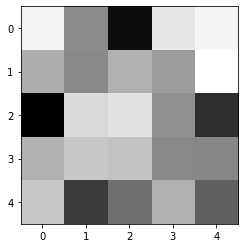

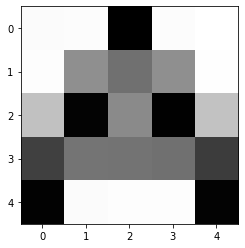

In [13]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#Define  patterns
def pattern_A(n):
    if (n==0):
        ft_In[n,:,:] = np.zeros((Num_inp,int(t_end/dt)))
        Inp[n,:] = np.zeros(Num_inp)
        PR = np.random.poisson(5,int(t_end/dt))
        ft_In[n,2,:][PR>5] = 1
        Inp[n,2] = 1
        ft_In[n,6,:][PR>5] = 1
        Inp[n,6] = 1
        ft_In[n,8,:][PR>5] = 1
        Inp[n,8] = 1
        ft_In[n,11,:][PR>5] = 1
        Inp[n,11] = 1
        ft_In[n,12,:][PR>5] = 1
        Inp[n,12] = 1
        ft_In[n,13,:][PR>5] = 1
        Inp[n,13] = 1
        ft_In[n,15,:][PR>5] = 1
        Inp[n,15] = 1
        ft_In[n,19,:][PR>5] = 1
        Inp[n,19] = 1
        ft_In[n,20,:][PR>5] = 1
        Inp[n,20] = 1
        ft_In[n,24,:][PR>5] = 1
        Inp[n,24] = 1
    elif (n==1):
        ft_In[n,:,:] = np.zeros((Num_inp,int(t_end/dt)))
        Inp[n,:] = np.zeros(Num_inp)
        PR = np.random.poisson(5,int(t_end/dt))
        ft_In[n,2,:][PR>5] = 1
        Inp[n,2] = 1
        ft_In[n,7,:][PR>5] = 1
        Inp[n,7] = 1
        ft_In[n,11,:][PR>5] = 1
        Inp[n,11] = 1
        ft_In[n,13,:][PR>5] = 1
        Inp[n,13] = 1
        ft_In[n,16,:][PR>5] = 1
        Inp[n,16] = 1
        ft_In[n,17,:][PR>5] = 1
        Inp[n,17] = 1
        ft_In[n,18,:][PR>5] = 1
        Inp[n,18] = 1
        ft_In[n,20,:][PR>5] = 1
        Inp[n,20] = 1
        ft_In[n,24,:][PR>5] = 1
        Inp[n,24] = 1
    elif (n==2):
        ft_In[n,:,:] = np.zeros((Num_inp,int(t_end/dt)))
        Inp[n,:] = np.zeros(Num_inp)
        PR = np.random.poisson(5,int(t_end/dt))
        ft_In[n,2,:][PR>5] = 1
        Inp[n,2] = 1
        ft_In[n,7,:][PR>5] = 1
        Inp[n,7] = 1
        ft_In[n,11,:][PR>5] = 1
        Inp[n,11] = 1
        ft_In[n,13,:][PR>5] = 1
        Inp[n,13] = 1
        ft_In[n,15,:][PR>5] = 1
        Inp[n,15] = 1
        ft_In[n,16,:][PR>5] = 1
        Inp[n,16] = 1
        ft_In[n,17,:][PR>5] = 1
        Inp[n,17] = 1
        ft_In[n,18,:][PR>5] = 1
        Inp[n,18] = 1
        ft_In[n,19,:][PR>5] = 1 
        Inp[n,19] = 1
        ft_In[n,20,:][PR>5] = 1
        Inp[n,20] = 1
        ft_In[n,24,:][PR>5] = 1 
        Inp[n,24] = 1
    elif (n==3):
        ft_In[n,:,:] = np.zeros((Num_inp,int(t_end/dt)))
        Inp[n,:] = np.zeros(Num_inp)
        PR = np.random.poisson(5,int(t_end/dt))
        ft_In[n,2,:][PR>5] = 1
        Inp[n,2] = 1
        ft_In[n,6,:][PR>5] = 1
        Inp[n,6] = 1
        ft_In[n,8,:][PR>5] = 1
        Inp[n,8] = 1
        ft_In[n,10,:][PR>5] = 1
        Inp[n,10] = 1
        ft_In[n,11,:][PR>5] = 1
        Inp[n,11] = 1
        ft_In[n,12,:][PR>5] = 1
        Inp[n,12] = 1
        ft_In[n,13,:][PR>5] = 1
        Inp[n,13] = 1
        ft_In[n,14,:][PR>5] = 1
        Inp[n,14] = 1
        ft_In[n,15,:][PR>5] = 1 
        Inp[n,15] = 1
        ft_In[n,19,:][PR>5] = 1
        Inp[n,19] = 1
        ft_In[n,20,:][PR>5] = 1 
        Inp[n,20] = 1  
        ft_In[n,24,:][PR>5] = 1 
        Inp[n,24] = 1           
    return(ft_In[n,:,:],Inp[n])
        

#Define parameters:
Num_inp = 25
Num_out = 1
Num_pat = 4
t_end = 200
dt = 1
touM = 15
touS = 20
A_inc = 0.0001
A_dec = -0.0002
V_th = 20
max_epo = 20
Weight = np.zeros((max_epo,Num_inp,Num_out))
W = 0.1*(np.random.random_sample((Num_inp,Num_out)))
W_int = 0.1*(np.random.random_sample((Num_inp,Num_out)))
j = 0
i = 0
Weight[0,:,:] = W

#Input & output neurons:
Inp = np.zeros((Num_pat,Num_inp))
ft_In = np.zeros((Num_pat,Num_inp,int(t_end/dt)))  # [](25*200)
ft_O = np.zeros((Num_out,int(t_end/dt)))


for i in range(Num_pat):
    (ft_In[i,:,:],Inp[i]) = pattern_A(i)

# We employ STDP and show the synaptic weight changes:
for epoch in range(max_epo):
    print(epoch)
    for pat in range(Num_pat):
        #####FeedForward processing:
        for outs in range(Num_out):
            j = 0
            for t in range(int(t_end/dt)): 
                v = 0
                for ins in range(Num_inp):
                    i = 0
                    for tt in range(int(t_end/dt)): 
                        if (ft_In[pat,ins,i]==1 and i<=j):
                            v = v + W[ins,outs]
                        i+=1
                if (v>=V_th):
                    ft_O[outs,j] = 1
                j+=1            
        ######################
        for outs in range(Num_out):
            j = 0
            for tpos in range(int(t_end/dt)-1):
                i = 0
                if (ft_O[outs,j]==1):
                    for ins in range(Num_inp):
                        i = 0
                        for tpre in range(int(t_end/dt)-1):
                            if (ft_In[pat,ins,i]==1):
                                if (tpre-tpos<=0):
                                    W[ins,outs] = W[ins,outs] + A_inc*np.exp((tpre-tpos)/touM)
                                else:
                                    W[ins,outs] = W[ins,outs] + A_dec*np.exp(-(tpre-tpos)/touS)

                            i+=1
                j+=1    
    Weight[epoch,:,:] = W         


ww=W_int.T
w=W_int.reshape(1,5,5)
plt.figure(1)
plt.imshow(w.reshape(5,5),'gray')
ww=W.T
w=W.reshape(1,5,5)
plt.figure(2)
plt.imshow(w.reshape(5,5),'gray')
    



In [17]:
####### Ex4: Change the parameters or input patterns or STDP definition

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#Define  your patterns
def your_pattern(n):
      ###
        
      ###  

#Define parameters:
Num_inp = #
Num_out = 1
Num_pat = #
t_end = 200
dt = 1
touM = #
touS = #
A_inc = #
A_dec = #
V_th = #
max_epo = 2
Weight = np.zeros((max_epo,Num_inp,Num_out))
W = 0.1*(np.random.random_sample((Num_inp,Num_out)))
W_int = 0.1*(np.random.random_sample((Num_inp,Num_out)))
j = 0
i = 0
Weight[0,:,:] = W

#Input & output neurons:
Inp = np.zeros((Num_pat,Num_inp))
ft_In = np.zeros((Num_pat,Num_inp,int(t_end/dt)))
ft_O = np.zeros((Num_out,int(t_end/dt)))

for i in range(Num_pat):
    (ft_In[i,:,:],Inp[i]) = your_pattern(i)


# We employ STDP and show the synaptic weight changes:
for epoch in range(max_epo):
    print(epoch)
    for pat in range(Num_pat):
        #####FeedForward processing:
        for outs in range(Num_out):
            j = 0
            for t in range(int(t_end/dt)): 
                v = 0
                for ins in range(Num_inp):
                    i = 0
                    for tt in range(int(t_end/dt)): 
                        if (ft_In[pat,ins,i]==1 and i<=j):
                            v = v + W[ins,outs]
                        i+=1
                if (v>=V_th):
                    ft_O[outs,j] = 1
                j+=1            
        ######################
        for outs in range(Num_out):
            j = 0
            for tpos in range(int(t_end/dt)-1):
                i = 0
                if (ft_O[outs,j]==1):
                    for ins in range(Num_inp):
                        i = 0
                        for tpre in range(int(t_end/dt)-1):
                            if (ft_In[pat,ins,i]==1):
                                if (tpre-tpos<=0):
                                    W[ins,outs] = W[ins,outs] + # Other definitions for STDP
                                else:
                                    W[ins,outs] = W[ins,outs] + # Other definitions for STDP

                            i+=1
                j+=1    
    Weight[epoch,:,:] = W         


ww=W_int.T
w=W_int.reshape(1,5,5)
plt.figure(1)
plt.imshow(w.reshape(5,5),'gray')
ww=W.T
w=W.reshape(1,5,5)
plt.figure(2)
plt.imshow(w.reshape(5,5),'gray')

IndentationError: expected an indented block (<ipython-input-17-d1088ae7891d>, line 15)

# BindsNet

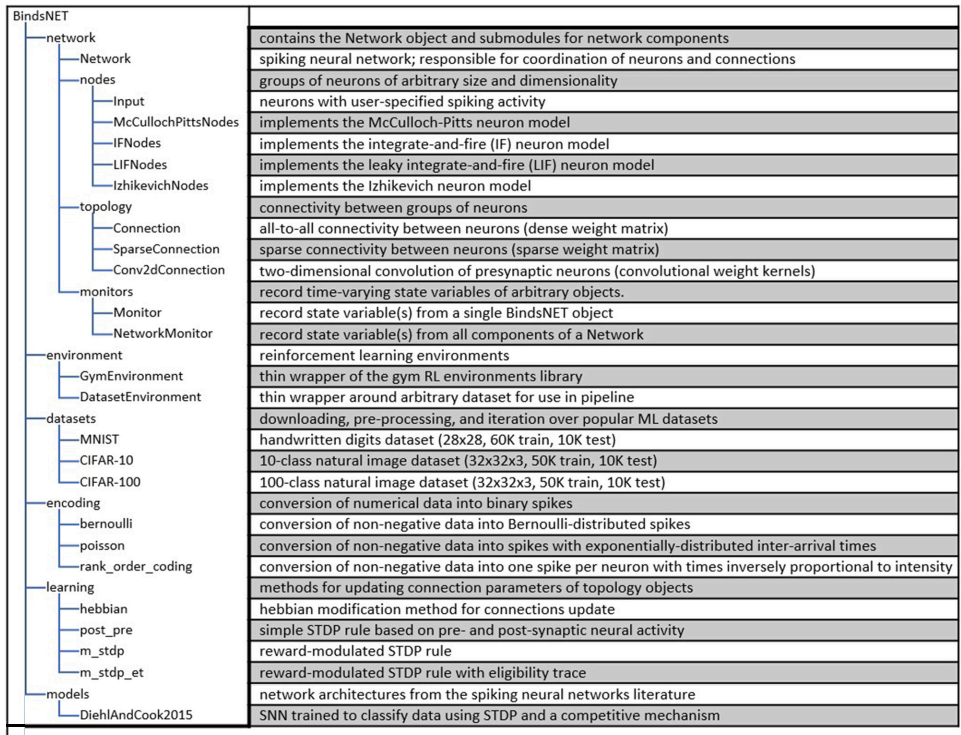

In [19]:
from IPython.display import Image 
Image('Images/BindNet.png')

class NewNodes(Nodes):
def __init__(self, n, shape, traces, ...):
...
def step(self, inpt, dt):
...
def reset_(self):
...

class NewConnection(AbstractConnection):
def __init__(self, source, target, **kwargs):
...
def compute(self, s):
...
def update(self, dt, **kwargs):
...
def normalize(self):
...
def reset_(self):
...

class NewLearningRule(LearningRule):
def __init__(self, connection, nu, weight_decay):
...
def update(self, dt, **kwargs):
...

# Creating a spiking neural network:

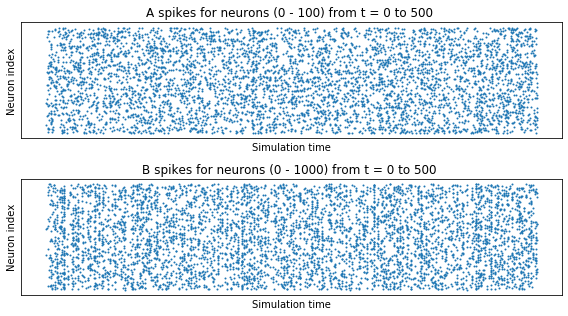

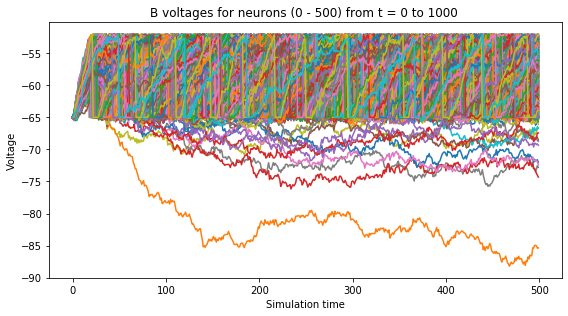

In [14]:
import torch
import matplotlib.pyplot as plt
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.analysis.plotting import plot_spikes, plot_voltages

# Simulation time.
time = 500

# Create the network.
network = Network()

# Create and add input, output layers.
source_layer = Input(n=100)
target_layer = LIFNodes(n=1000)

network.add_layer(layer=source_layer, name="A")
network.add_layer(layer=target_layer, name="B")

# Create connection between input and output layers.
forward_connection = Connection(
source=source_layer,
target=target_layer,
w=0.05 + 0.1 * torch.randn(source_layer.n, target_layer.n))

network.add_connection(connection=forward_connection, source="A", target="B")

# Create recurrent connection in output layer.
recurrent_connection = Connection(
source=target_layer,
target=target_layer,
w=0.025 * (torch.eye(target_layer.n) - 1))

network.add_connection(connection=recurrent_connection, source="B", target="B")

# Create and add input and output layer monitors.
source_monitor = Monitor(
obj=source_layer,
state_vars=("s",), # Record spikes and voltages.
time=time, # Length of simulation (if known ahead of time).
)
target_monitor = Monitor(
obj=target_layer,
state_vars=("s", "v"), # Record spikes and voltages.
time=time, # Length of simulation (if known ahead of time).
)
network.add_monitor(monitor=source_monitor, name="A")
network.add_monitor(monitor=target_monitor, name="B")

# Create input spike data, where each spike is distributed according to Bernoulli(0.1).
input_data = torch.bernoulli(0.1 * torch.ones(time, source_layer.n)).byte()
Inputs = {"A": input_data}

# Simulate network on input data.
network.run(inputs=Inputs, time=time)

# Retrieve and plot simulation spike, voltage data from monitors.
spikes = {
"A": source_monitor.get("s"), "B": target_monitor.get("s")
}
voltages = {"B": target_monitor.get("v")}
plt.ioff()
plot_spikes(spikes)
plot_voltages(voltages, plot_type="line")
plt.show()

# Creating a learning rule:

In [ ]:
from bindsnet.network.nodes import Input, LIFNodes
from bindsnet.network.topology import Connection
from bindsnet.learning import PostPre

# Create two populations of neurons, one to act as the "source"
# population, and the other, the "target population".
# Neurons involved in certain learning rules must record synaptic
# traces, a vector of short-term memories of the last emitted spikes.
network = Network()
source_layer = Input(n=100)
target_layer = LIFNodes(n=1000)

network.add_layer(...)
network.add_layer(...)

# Connect the two layers.
connection = Connection(source=source_layer, target=target_layer, update_rule=PostPre, nu=(1e-4, 1e-2))
network.add_connection()


# MNIST example

In [ ]:
import torch
import argparse
import matplotlib.pyplot as plt
from torchvision import transforms

from time import time as t
from tqdm import tqdm

from bindsnet.network import Network
from bindsnet.datasets import MNIST
from bindsnet.encoding import PoissonEncoder
from bindsnet.learning import PostPre
from bindsnet.network.monitors import Monitor
from bindsnet.network.nodes import DiehlAndCookNodes, Input
from bindsnet.network.topology import Conv2dConnection, Connection
from bindsnet.analysis.plotting import (
    plot_input,
    plot_spikes,
    plot_conv2d_weights,
    plot_voltages,
)


# Define parameters:

seed = 0
n_epochs = 1
kernel_size =16
stride = 4
n_filters = 25
padding = 0
time = 50
dt = 1.0
intensity = 128.0
train = True
plot = True
torch.manual_seed(seed)

conv_size = int((28 - kernel_size + 2 * padding) / stride) + 1


##############################
####### Build network: #######
network = Network()

input_layer = Input(n=784, shape=(1, 28, 28), traces=True)

conv_layer = DiehlAndCookNodes(
    n=n_filters * conv_size * conv_size,
    shape=(n_filters, conv_size, conv_size),
    traces=True,
)

conv_conn = Conv2dConnection(
    input_layer,
    conv_layer,
    kernel_size=kernel_size,
    stride=stride,
    update_rule=PostPre,
    norm=0.4 * kernel_size ** 2,
    nu=[1e-4, 1e-2],
    wmax=1.0,
)

w = torch.zeros(n_filters, conv_size, conv_size, n_filters, conv_size, conv_size)
for fltr1 in range(n_filters):
    for fltr2 in range(n_filters):
        if fltr1 != fltr2:
            for i in range(conv_size):
                for j in range(conv_size):
                    w[fltr1, i, j, fltr2, i, j] = -100.0

w = w.view(n_filters * conv_size * conv_size, n_filters * conv_size * conv_size)

recurrent_conn = Connection(conv_layer, conv_layer, w=w)

network.add_layer(input_layer, name="X")
network.add_layer(conv_layer, name="Y")
network.add_connection(conv_conn, source="X", target="Y")
network.add_connection(recurrent_conn, source="Y", target="Y")


# Load MNIST data.
train_dataset = MNIST(
    PoissonEncoder(time=time, dt=dt),
    None,
    "../../data/MNIST",
    download=True,
    train=True,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Lambda(lambda x: x * intensity)]
    ),
)

# Record state variables:
spikes = {}
for layer in set(network.layers):
    spikes[layer] = Monitor(network.layers[layer], state_vars=["s"], time=time)
    network.add_monitor(spikes[layer], name="%s_spikes" % layer)

voltages = {}
for layer in set(network.layers) - {"X"}:
    voltages[layer] = Monitor(network.layers[layer], state_vars=["v"], time=time)
    network.add_monitor(voltages[layer], name="%s_voltages" % layer)


##################################
####### Train the network: #######
print("Begin training.\n")

inpt_axes = None
inpt_ims = None
spike_ims = None
spike_axes = None
weights1_im = None
voltage_ims = None
voltage_axes = None

for epoch in range(n_epochs):

    train_dataloader = torch.utils.data.DataLoader(
        train_dataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=False
    )

    for step, batch in enumerate(tqdm(train_dataloader)):
        # Get next input sample.

        inputs = {"X": batch["encoded_image"].view(time, 1, 1, 28, 28)}
        label = batch["label"]

        # Run the network on the input.
        network.run(inputs=inputs, time=time, input_time_dim=1)

        # Optionally plot various simulation information.
        if plot:
            image = batch["image"].view(28, 28)

            inpt = inputs["X"].view(time, 784).sum(0).view(28, 28)
            weights1 = conv_conn.w
            _spikes = {
                "X": spikes["X"].get("s").view(time, -1),
                "Y": spikes["Y"].get("s").view(time, -1),
            }
            #_voltages = {"Y": voltages["Y"].get("v").view(time, -1)}

            inpt_axes, inpt_ims = plot_input(
                image, inpt, label=label, axes=inpt_axes, ims=inpt_ims
            )
            #spike_ims, spike_axes = plot_spikes(_spikes, ims=spike_ims, axes=spike_axes)
            weights1_im = plot_conv2d_weights(weights1, im=weights1_im)
            #voltage_ims, voltage_axes = plot_voltages(
                #_voltages, ims=voltage_ims, axes=voltage_axes
            #)

            plt.pause(1)

        network.reset_state_variables()  # Reset state variables.
        
print("Training complete.\n")


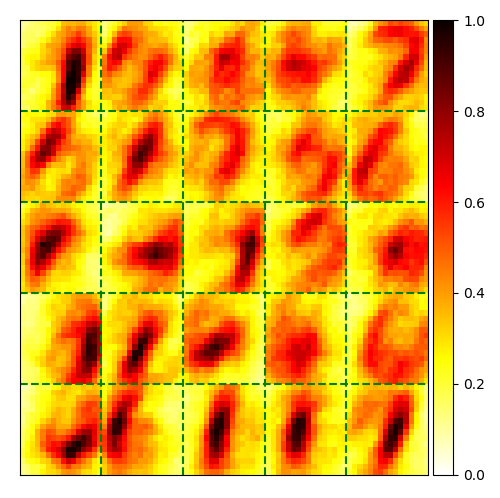

In [4]:
from IPython.display import Image 
Image('Images/Features.png')

In [ ]:
####### Ex5:  Create your own network


import torch
import argparse
import matplotlib.pyplot as plt
from torchvision import transforms

from time import time as t
from tqdm import tqdm

from bindsnet.datasets import MNIST
from bindsnet.encoding import #
from bindsnet.network import Network
from bindsnet.learning import #
from bindsnet.network.monitors import Monitor
from bindsnet.network.nodes import #
from bindsnet.network.topology import #
from bindsnet.analysis.plotting import (
    plot_input,
    plot_spikes,
    plot_conv2d_weights,
    plot_voltages,
)


# Define parameters:

seed = 0
n_epochs = 1
kernel_size = #
stride = #
n_filters = #
padding = #
time = #
dt = #
intensity = 128.0
progress_interval = 10
update_interval = 250
train = True
plot = True
torch.manual_seed(seed)

conv_size = int((28 - kernel_size + 2 * padding) / stride) + 1
per_class = int((n_filters * conv_size * conv_size) / 10)


##############################
####### Build network: #######
network = Network()

# Create the layers

#Create the connections

###
w = torch.zeros(n_filters, conv_size, conv_size, n_filters, conv_size, conv_size)
for fltr1 in range(n_filters):
    for fltr2 in range(n_filters):
        if fltr1 != fltr2:
            for i in range(conv_size):
                for j in range(conv_size):
                    w[fltr1, i, j, fltr2, i, j] = -100.0

w = w.view(n_filters * conv_size * conv_size, n_filters * conv_size * conv_size)
recurrent_conn = Connection(conv_layer, conv_layer, w=w)
###

# Add layers 

# Add connections


# Load MNIST data.
train_dataset = MNIST(
    PoissonEncoder(time=time, dt=dt),
    None,
    "../../data/MNIST",
    download=True,
    train=True,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Lambda(lambda x: x * intensity)]
    ),
)

###
# Record state variables:
spikes = {}
for layer in set(network.layers):
    spikes[layer] = Monitor(network.layers[layer], state_vars=["s"], time=time)
    network.add_monitor(spikes[layer], name="%s_spikes" % layer)

voltages = {}
for layer in set(network.layers) - {"X"}:
    voltages[layer] = Monitor(network.layers[layer], state_vars=["v"], time=time)
    network.add_monitor(voltages[layer], name="%s_voltages" % layer)
    
voltage_monitor = Monitor(network.layers["Y"], ["v"], time=time)
network.add_monitor(voltage_monitor, name="output_voltage")
###


##################################
####### Train the network: #######
print("Begin training.\n")

###
inpt_axes = None
inpt_ims = None
spike_ims = None
spike_axes = None
weights1_im = None
voltage_ims = None
voltage_axes = None
###

for epoch in range(n_epochs):

    train_dataloader = torch.utils.data.DataLoader(
        train_dataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=False
    )

    for step, batch in enumerate(tqdm(train_dataloader)):
        # Get next input sample.

        inputs = {"X": batch["encoded_image"].view(time, 1, 1, 28, 28)}
        label = batch["label"]

        # Run the network on the input.
        network.run(inputs=inputs, time=time, input_time_dim=1)

        # Optionally plot various simulation information.
        if plot:
            
            ###
            image = batch["image"].view(28, 28)
            inpt = inputs["X"].view(time, 784).sum(0).view(28, 28)
            weights1 = conv_conn.w
            _spikes = {
                "X": spikes["X"].get("s").view(time, -1),
                "Y": spikes["Y"].get("s").view(time, -1),
            }
            
            inpt_axes, inpt_ims = plot_input(image, inpt, label=label, axes=inpt_axes, ims=inpt_ims)
            weights1_im = plot_conv2d_weights(weights1, im=weights1_im)
            ###
            
            plt.pause(1)

        network.reset_state_variables()  # Reset state variables.
        
print("Training complete.\n")
